In [120]:
%pylab inline
import h5py

sys.path.append('mnt/sw/nix/store/i4qqrrhx6cjsr6r2vl06h9fwbzc9qs8p-texlive-20210325/bin/x86_64-linux/')

plt.style.use("/mnt/home/nico/matplotlib.mplstyle")

#import nba
import sys
sys.path.append("/mnt/home/ecunningham/python")
sys.path.append("../scripts/src/")
sys.path.append("../scripts/src/")


import pynbody
import pynbody_routines as pr
import gizmo_analysis as ga

from matplotlib import colors
import halo_analysis as halo
import io_gizmo_pynbody as fa
#import analysis as fa
from scipy import interpolate

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [129]:
plt.rcParams['text.usetex'] = False

In [166]:
lmc3 = np.loadtxt('../data/orbits/LMC3_orbit_host.txt')
lmc4 = np.loadtxt('../data/orbits/LMC4_orbit_host.txt')
lmc5 = np.loadtxt('../data/orbits/LMC5_orbit_host.txt')
lmc6 = np.loadtxt('../data/orbits/LMC6_orbit_host.txt')


In [111]:
def mwlmc_sims(orbit):
    mwx = orbit[:,0]
    mwy = orbit[:,1]
    mwz = orbit[:,2]
    
    mwvx = orbit[:,3]
    mwvy = orbit[:,4]
    mwvz = orbit[:,5]
    
    return np.array([mwx, mwy, mwz]).T, np.array([mwvx, mwvy, mwvz]).T
    

In [167]:
rlmc3, vlmc3 = mwlmc_sims(lmc3)
rlmc4, vlmc4 = mwlmc_sims(lmc4)
rlmc5, vlmc5 = mwlmc_sims(lmc5)
rlmc6, vlmc6 = mwlmc_sims(lmc6)

In [168]:
lmc3 = np.loadtxt('../data/orbits/LMC3_orbit_satellite.txt')
lmc4 = np.loadtxt('../data/orbits/LMC4_orbit_satellite.txt')
lmc5 = np.loadtxt('../data/orbits/LMC5_orbit_satellite.txt')
lmc6 = np.loadtxt('../data/orbits/LMC6_orbit_satellite.txt')


In [127]:
t1 = np.arange(0, 400, 5)*0.02 


In [169]:
f1 = interpolate.interp1d(t1, norm(lmc3[:,0:3]-rlmc3, axis=1), kind='cubic')
f2 = interpolate.interp1d(t1, norm(lmc4[:,0:3]-rlmc4, axis=1), kind='cubic')

f3 = interpolate.interp1d(t1, norm(lmc5[:,0:3]-rlmc5, axis=1), kind='cubic')
f4 = interpolate.interp1d(t1, norm(lmc6[:,0:3]-rlmc6, axis=1), kind='cubic')



fv1 = interpolate.interp1d(t1, norm(lmc3[:,3:6]-vlmc3, axis=1), kind='cubic')
fv2 = interpolate.interp1d(t1, norm(lmc4[:,3:6]-vlmc4, axis=1), kind='cubic')
fv3 = interpolate.interp1d(t1, norm(lmc5[:,3:6]-vlmc5, axis=1), kind='cubic')
fv4 = interpolate.interp1d(t1, norm(lmc6[:,3:6]-vlmc6, axis=1), kind='cubic')

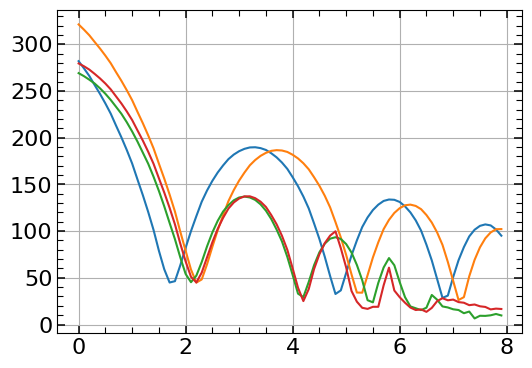

In [170]:
plt.plot(t1, norm(lmc3[:,0:3]-rlmc3, axis=1))
plt.plot(t1, norm(lmc4[:,0:3]-rlmc4, axis=1))
plt.plot(t1, norm(lmc5[:,0:3]-rlmc5, axis=1))
plt.plot(t1, norm(lmc6[:,0:3]-rlmc6, axis=1))
plt.grid()

In [137]:
tintep = np.arange(0, 395, 1)*0.02

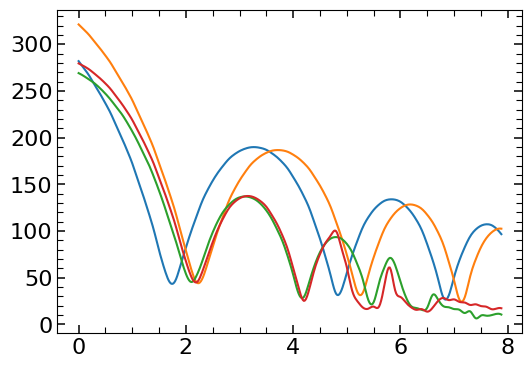

In [171]:
plt.plot(tintep, f1(tintep))
plt.plot(tintep, f2(tintep))
plt.plot(tintep, f3(tintep))
plt.plot(tintep, f4(tintep))

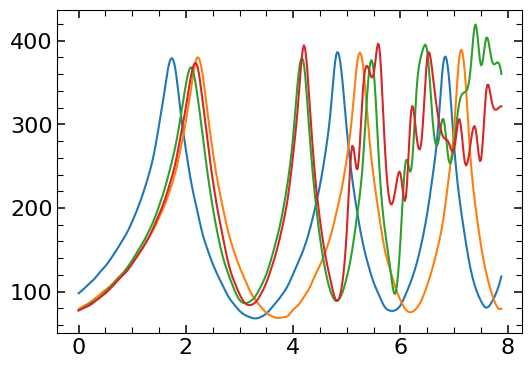

In [172]:
plt.plot(tintep, fv1(tintep))
plt.plot(tintep, fv2(tintep))
plt.plot(tintep, fv3(tintep))
plt.plot(tintep, fv4(tintep))



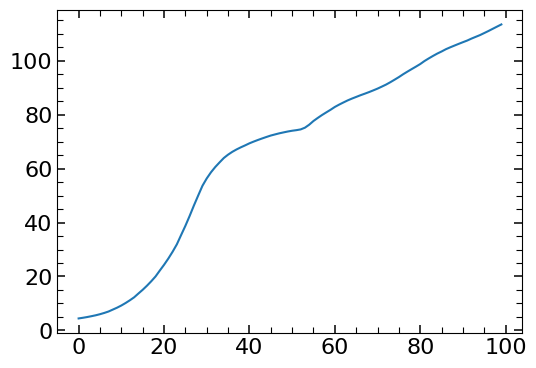

In [60]:
plt.plot(norm(MWLMC6_host_orbit[0:400:4, 0:3], axis=1))

In [103]:
# Get all the subhalos
def host_velocities(sim):
    center_coordinates = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/track/host_coordinates.hdf5".format(sim)
    f = h5py.File(center_coordinates, 'r')
    vel = np.sqrt(np.sum(f['host.velocity'][1:,0]**2, axis=1))
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[1:], vel, f['host.velocity'][1:,:]

def get_halo_satellite(sim, mass_rank):
    sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)
    m12_subhalos = halo.io.IO.read_catalogs('index', 300, sim_directory)

    halt = halo.io.IO.read_tree(simulation_directory=sim_directory)
    hsub = pr.pynbody_subhalos(m12_subhalos)
    sat_id = np.argsort(hsub.dark['mass'])[mass_rank]
    sat_tree_id = m12_subhalos['tree.index'][sat_id]
    satellite = fa.return_tracked_pos(halt, sat_tree_id, pynbody_halo=True)
    return satellite, sat_tree_id


In [104]:
# Finding all m12 massive satellites
m12b_t, m12b_vel, m12b_3dv = host_velocities('m12b')

m12b_sat, ids = get_halo_satellite('m12b', -2)
m12i_sat, ids = get_halo_satellite('m12i', -11)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in halo_analysis.halo_io.IO():
* read 51054 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 51054 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5

N satellites = 96

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot

In [105]:
m12i_t, m12i_vel, m12i_3dv = host_velocities('m12i')


In [106]:
def mwlmc_sims(orbit):
    lmcx = orbit[:,6] - orbit[:,0]
    lmcy = orbit[:,7] - orbit[:,1]
    lmcz = orbit[:,8] - orbit[:,2]
    
    lmcvx = orbit[:,9] - orbit[:,3]
    lmcvy = orbit[:,10] - orbit[:,4]
    lmcvz = orbit[:,11] - orbit[:,5]
    
    return np.array([lmcx, lmcy, lmcz]).T, np.array([lmcvx, lmcvy, lmcvz]).T

In [107]:
t_sm12b = m12b_t[np.arange(200, 600, 10)]
t_sm12i = m12i_t[np.arange(200, 600, 10)]

In [108]:
m12b_r = np.zeros(40)
m12i_r = np.zeros(40)
j=0
for k in range(200, 600, 10):
    m12b_subhalos = halo.io.IO.read_catalogs('index', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/")
    m12i_subhalos = halo.io.IO.read_catalogs('index', k, "/mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/")
    m12b_r[j] = np.max(m12b_subhalos['radius'])
    m12i_r[j] = np.max(m12i_subhalos['radius'])
    
    j+=1


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 200, redshift = 1.647

* read 51541 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_200.hdf5

# in halo_analysis.halo_io.Particle():
* read 51541 halos, 134 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_200.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot index = 200, redshift = 1.647

* read 47215 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/halo_200.hdf5

# in halo_analysis.halo_io.Particle():
* read 47215 halos, 91 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100

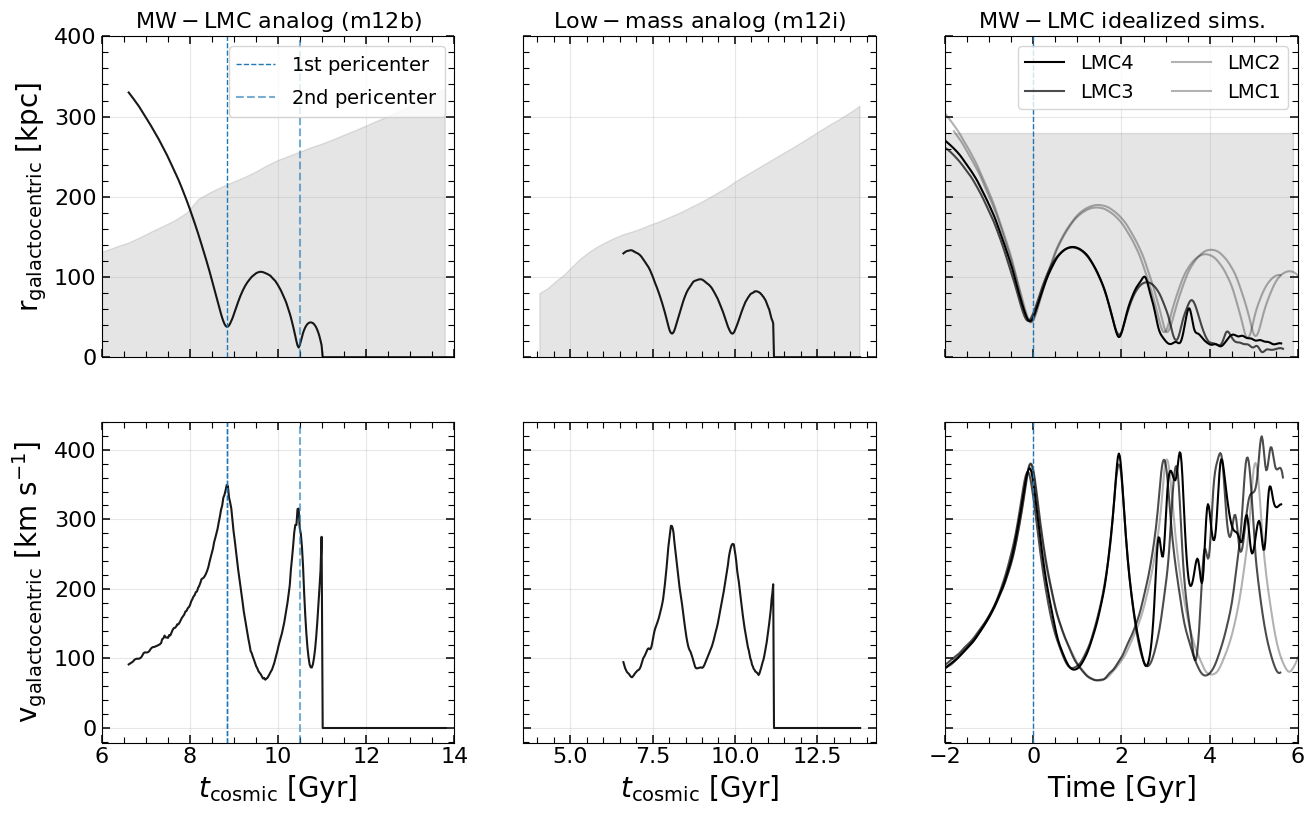

In [176]:
fig, ax = plt.subplots(2, 3, figsize=(14, 9), sharex='col', sharey='row')

## Top panels

ax[0][0].plot(m12b_t[300:], norm(m12b_sat['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 
ax[0][1].plot(m12i_t[300:], norm(m12i_sat['pos'], axis=1), c='k', lw=1.5, alpha=0.9) 

ax[0][2].plot(tintep-tintep[113], f4(tintep), c='k',lw=1.5, alpha=1, label='LMC4')
ax[0][2].plot(tintep-tintep[111], f3(tintep), c='k',lw=1.5, alpha=0.7, label='LMC3')
ax[0][2].plot(tintep-tintep[114],  f2(tintep), c='k',lw=1.5, alpha=0.3, label='LMC2')
ax[0][2].plot(tintep-tintep[90],  f1(tintep), c='k',lw=1.5, alpha=0.3, label='LMC1')



## Bottom panels

ax[1][0].plot(m12b_t[300:], norm(m12b_sat['vel'], axis=1), c='k', lw=1.5, alpha=0.9) 
ax[1][1].plot(m12i_t[300:], norm(m12i_sat['vel'], axis=1), c='k', lw=1.5, alpha=0.9) 
ax[1][2].plot(tintep-tintep[113], fv4(tintep), c='k',lw=1.5, alpha=1)
ax[1][2].plot(tintep-tintep[111], fv3(tintep), c='k',lw=1.5, alpha=0.7)
ax[1][2].plot(tintep-tintep[114], fv2(tintep), c='k',lw=1.5, alpha=0.7)
ax[1][2].plot(tintep-tintep[90], fv1(tintep), c='k',lw=1.5, alpha=0.3)


## Titles and labels 

ax[1][0].set_xlabel(r'$t\rm{_{cosmic}\ [Gyr]}$')
ax[1][1].set_xlabel(r'$t\rm{_{cosmic}\ [Gyr]}$')
ax[1][2].set_xlabel(r'$\rm{Time\ [Gyr]}$')

ax[0][0].set_ylabel(r'$\rm{r_{galactocentric}\ \rm{[kpc]}}$')
ax[1][0].set_ylabel(r'$\rm{v_{galactocentric}\ \rm{[km\ s^{-1}]}}$')

ax[0][0].set_title(r'$\rm{MW-LMC\ analog\ (m12b)}$', fontsize=16)
ax[0][1].set_title(r'$\rm{Low-mass\ analog\ (m12i)}$', fontsize=16)
ax[0][2].set_title(r'$\rm{MW-LMC\ idealized\ sims.}$', fontsize=16)


# Grid 
ax[0][0].grid(alpha=0.3)
ax[0][1].grid(alpha=0.3)
ax[0][2].grid(alpha=0.3)

ax[1][0].grid(alpha=0.3)
ax[1][1].grid(alpha=0.3)
ax[1][2].grid(alpha=0.3)


##  pericenters 
ax[0][0].axvline(m12b_t[385], ls='--',lw=1, label=r'$\rm{1st\ pericenter}$')
ax[0][0].axvline(m12b_t[450], ls='--',lw=1.5, label=r'$\rm{2nd\ pericenter}$', alpha=0.6)

ax[1][0].axvline(m12b_t[385], ls='--',lw=1)
ax[1][0].axvline(m12b_t[450], ls='--',lw=1.5, alpha=0.6)

ax[0][0].legend(fontsize=14)
ax[0][2].legend(fontsize=14, ncol=2)


ax[0][2].axvline(0, ls='--',lw=1)

ax[1][0].axvline(m12b_t[385], ls='--',lw=1)
ax[1][2].axvline(0, ls='--',lw=1)


## Rvir
ax[0][0].fill_between(t_sm12b, m12b_r, color='k', alpha=0.1)
ax[0][1].fill_between(t_sm12i, m12i_r, color='k', alpha=0.1)
ax[0][2].fill_between(tintep-2, np.ones(395)*279, color='k', alpha=0.1)


## 
ax[0][0].set_ylim(0, 400)
ax[0][0].set_xlim(6, 14)
ax[0][2].set_xlim(-2, 6)


plt.tight_layout()

#plt.savefig('m12_main_com_sats.png', bbox_inches='tight')
#plt.savefig('m12_main_com_sats.pdf', bbox_inches='tight')

plt.savefig('fig3_sat_orbits.png', bbox_inches='tight')
plt.savefig('fig3_sat_orbits.pdf', bbox_inches='tight')


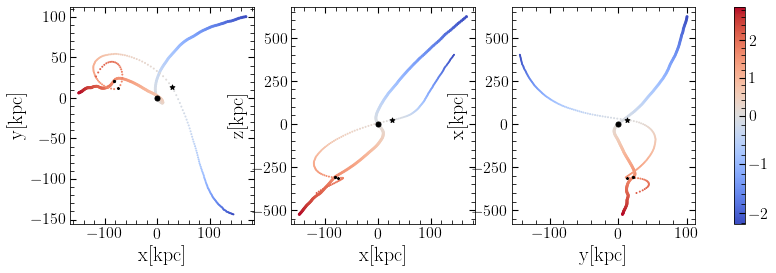

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
maxs=200
im = ax[0].scatter(pos[:maxs,0]-pos[85,0], pos[:maxs,1]-pos[85,1], c=times[300:500]-times[385], cmap='coolwarm', norm=divnorm, s=4)
ax[1].scatter(pos[:maxs,0]-pos[85,0], pos[:maxs,2]-pos[85,2], c=times[300:500]-times[385], cmap='coolwarm', norm=divnorm, s=4)
ax[2].scatter(pos[:maxs,1]-pos[85,1], pos[:maxs,2]-pos[85,2], c=times[300:500]-times[385], cmap='coolwarm', norm=divnorm, s=4)


ax[0].scatter(satellite_faceon['pos'][:200,0] + pos[:maxs,0]-pos[85,0], 
              satellite_faceon['pos'][:200,1] + pos[:maxs,1]-pos[85,1],
              c=times[300:500]-times[385],cmap='coolwarm', norm=divnorm, s=1)
ax[1].scatter(satellite_faceon['pos'][:200,0] + pos[:maxs,0]-pos[85,0], 
              satellite_faceon['pos'][:200:,2] + pos[:maxs,2]-pos[85,2], 
              c=times[300:500]-times[385],cmap='coolwarm', norm=divnorm, s=1)
ax[2].scatter(satellite_faceon['pos'][:200,1] + pos[:maxs,1]-pos[85,1], 
              satellite_faceon['pos'][:200,2] + pos[:maxs,2]-pos[85,2],
              c=times[300:500]-times[385],cmap='coolwarm', norm=divnorm, s=1)

ax[0].scatter(pos[85,0]-pos[85,0], pos[85,1]-pos[85,1], c='k')
ax[0].scatter(satellite_faceon['pos'][85,0] + pos[85,0]-pos[85,0], 
              satellite_faceon['pos'][85,1] + pos[85,1]-pos[85,1],
              c='k',marker='*')

ax[0].scatter(pos[149,0]-pos[85,0], pos[149,1]-pos[85,1], c='k', s=5)
ax[0].scatter(satellite_faceon['pos'][149,0] + pos[149,0]-pos[85,0], 
              satellite_faceon['pos'][149,1] + pos[149,1]-pos[85,1],
              c='k',marker='*', s=5)


ax[1].scatter(pos[85,0]-pos[85,0], pos[85,2]-pos[85,2], c='k')
ax[1].scatter(satellite_faceon['pos'][85,0] + pos[85,0]-pos[85,0], 
              satellite_faceon['pos'][85,2] + pos[85,2]-pos[85,2],
              c='k',marker='*')

ax[1].scatter(pos[149,0]-pos[85,0], pos[149,2]-pos[85,2], c='k', s=5)
ax[1].scatter(satellite_faceon['pos'][149,0] + pos[149,0]-pos[85,0], 
              satellite_faceon['pos'][149,2] + pos[149,2]-pos[85,2],
              c='k',marker='*', s=5)

ax[2].scatter(pos[85,1]-pos[85,1], pos[85,2]-pos[85,2], c='k')
ax[2].scatter(satellite_faceon['pos'][85,1] + pos[85,1]-pos[85,1], 
              satellite_faceon['pos'][85,2] + pos[85,2]-pos[85,2],
              c='k',marker='*')

ax[2].scatter(pos[149,1]-pos[85,1], pos[149,2]-pos[85,2], c='k', s=5)
ax[2].scatter(satellite_faceon['pos'][149,1] + pos[149,1]-pos[85,1], 
              satellite_faceon['pos'][149,2] + pos[149,2]-pos[85,2],
              c='k',marker='*', s=5)

#ax[1].scatter(satellite_faceon['pos'][:200,0] + pos[:maxs,0]-pos[85,0], 
#              satellite_faceon['pos'][:200:,2] + pos[:maxs,2]-pos[85,2], 
#              c=times[300:500]-times[385],cmap='coolwarm', norm=divnorm, s=1)
#ax[2].scatter(satellite_faceon['pos'][:200,1] + pos[:maxs,1]-pos[85,1], 
#              satellite_faceon['pos'][:200,2] + pos[:maxs,2]-pos[85,2],
#              c=times[300:500]-times[385],cmap='coolwarm', norm=divnorm, s=1)


ax[0].set_xlabel(r'$\rm{x[kpc]}$')
ax[0].set_ylabel(r'$\rm{y[kpc]}$')
ax[1].set_xlabel(r'$\rm{x[kpc]}$')
ax[1].set_ylabel(r'$\rm{z[kpc]}$')
ax[2].set_xlabel(r'$\rm{y[kpc]}$')
ax[2].set_ylabel(r'$\rm{x[kpc]}$')

fig.colorbar(im, ax=ax[:])

plt.savefig('../plots/exploration/m12b_orbits_projected_faceon.png', bbox_inches='tight', dpi=300)
plt.savefig('../plots/exploration/m12b_orbits_projected_faceon.pdf', bbox_inches='tight')

In [25]:
pos_motion = np.sqrt(np.sum((pos-pos[85])**2, axis=1))
vel_motion = np.sqrt(np.sum(vel**2, axis=1))


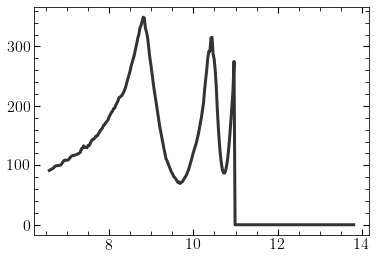

In [26]:
plot(times[300:], np.sqrt(np.sum((satellite_faceon['vel'])**2, axis=1)), c='k', alpha=0.8)


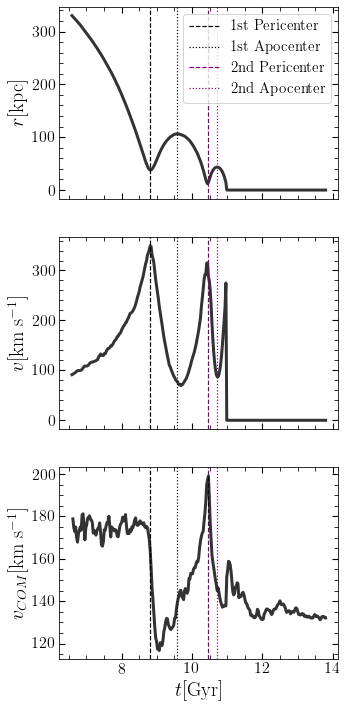

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(5, 12), sharex=True)
ax[0].plot(times[300:], np.sqrt(np.sum((satellite_faceon['pos'])**2, axis=1)), c='k', alpha=0.8)
ax[0].axvline(times[385], c='k', lw=1.2, ls='--', label=r'$\rm{1st\ Pericenter}$')
ax[0].axvline(times[415], c='k', lw=1.2, ls=':', label=r'$\rm{1st\ Apocenter}$')

ax[0].axvline(times[449], c='purple', lw=1.2, ls='--', label=r'$\rm{2nd\ Pericenter}$')
ax[0].axvline(times[460], c='purple', lw=1.2, ls=':' , label=r'$\rm{2nd\ Apocenter}$')


ax[1].plot(times[300:], np.sqrt(np.sum((satellite_faceon['vel'])**2, axis=1)), c='k', alpha=0.8)
ax[1].axvline(times[385], c='k', lw=1.2, ls='--', label=r'$\rm{1st\ Pericenter}$')
ax[1].axvline(times[415], c='k', lw=1.2, ls=':', label=r'$\rm{1st\ Apocenter}$')

ax[1].axvline(times[449], c='purple', lw=1.2, ls='--', label=r'$\rm{2nd\ Pericenter}$')
ax[1].axvline(times[460], c='purple', lw=1.2, ls=':' , label=r'$\rm{2nd\ Apocenter}$')


ax[2].axvline(times[385], c='k', lw=1.2, ls='--')
ax[2].axvline(times[415], c='k', lw=1.2, ls=':')

ax[2].axvline(times[449], c='purple', lw=1.2, ls='--')
ax[2].axvline(times[460], c='purple', lw=1.2, ls=':')

ax[2].plot(times[301:], vel_motion, c='k', alpha=0.8)

ax[2].set_xlabel(r'$t\rm{[Gyr]}$')
ax[0].set_ylabel(r'$r\rm{[kpc]}$')
ax[1].set_ylabel(r'$v\rm{[km\ s^{-1}]}$')

ax[2].set_ylabel(r'$v_{COM}\rm{[km\ s^{-1}]}$')

ax[0].legend(fontsize=15)

#plt.grid()
plt.savefig('../plots/exploration/m12b_sat_distance_vcom.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_945540/4031048090.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharex=True)


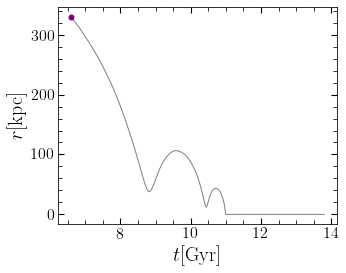

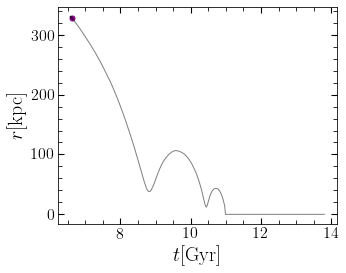

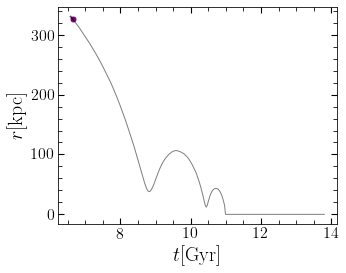

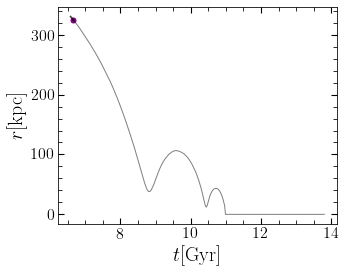

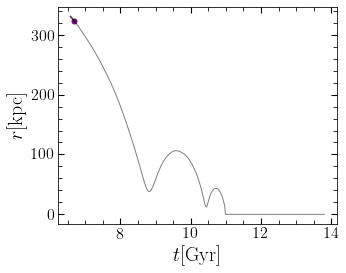

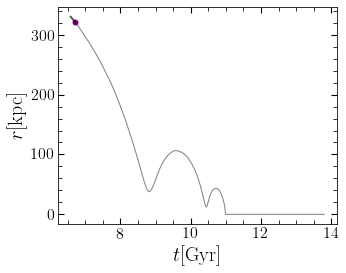

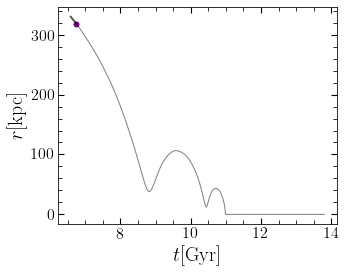

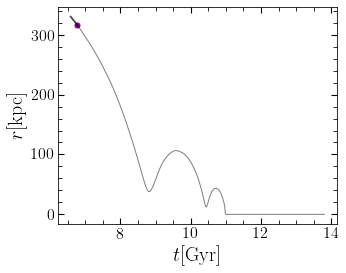

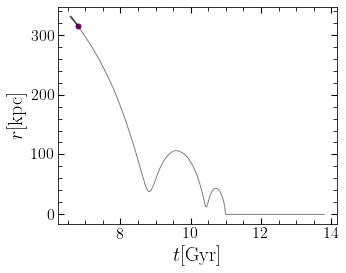

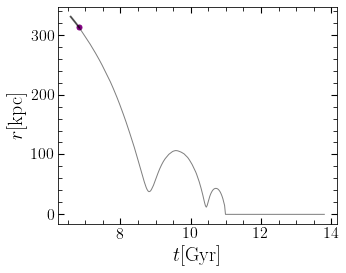

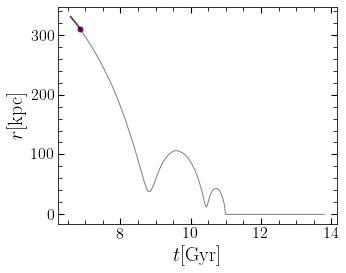

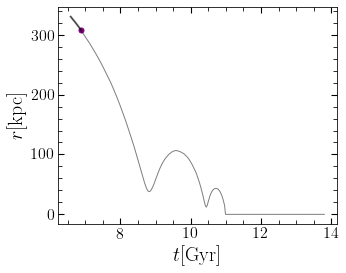

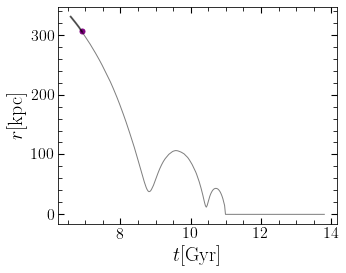

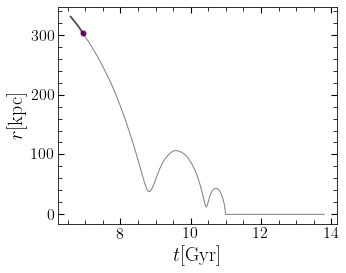

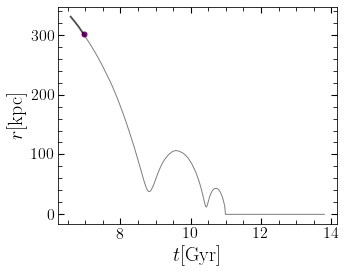

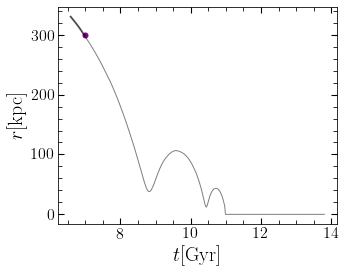

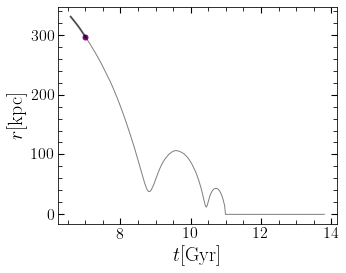

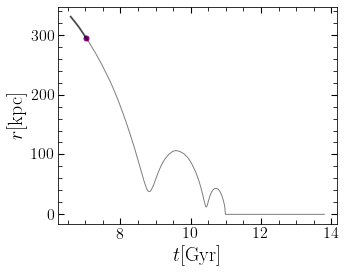

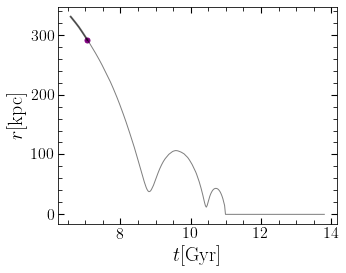

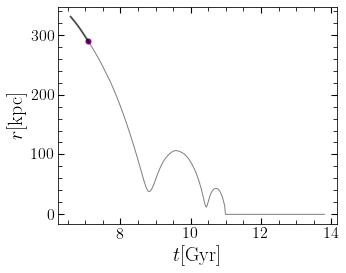

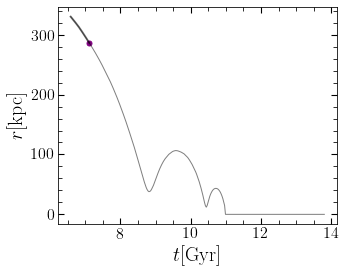

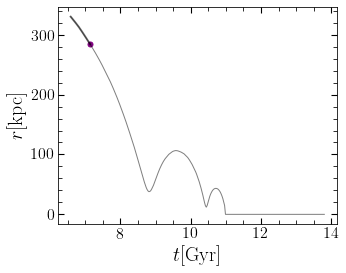

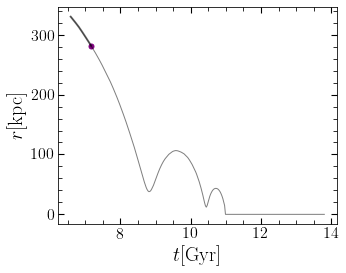

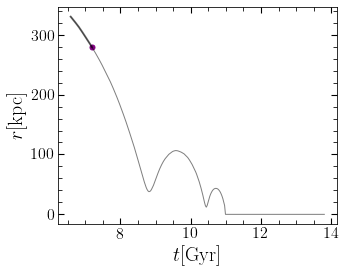

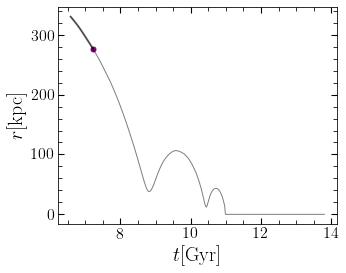

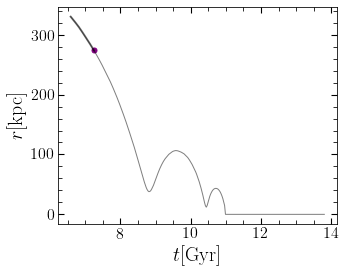

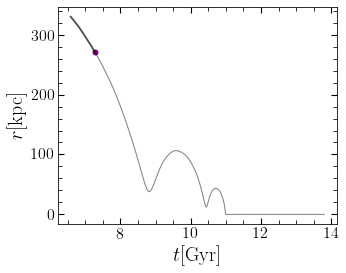

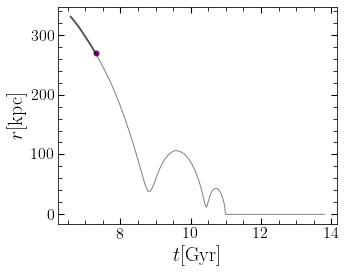

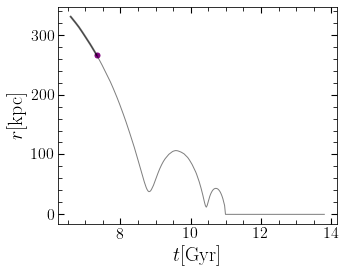

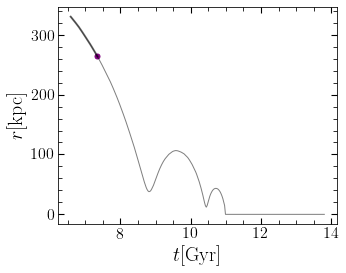

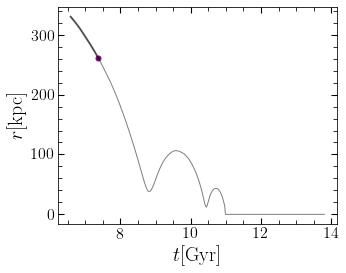

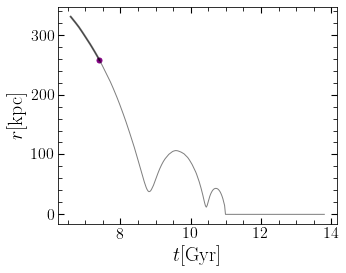

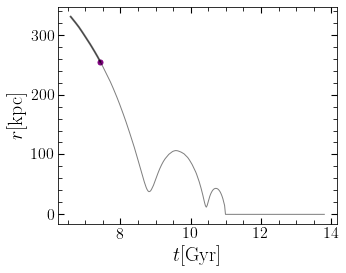

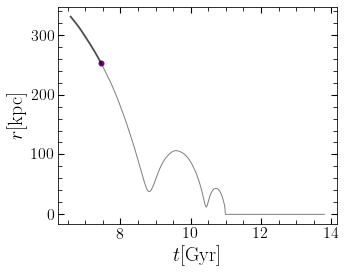

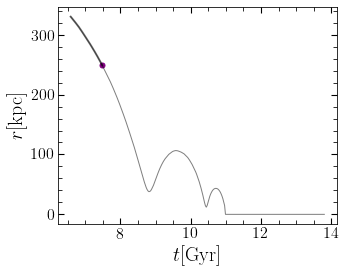

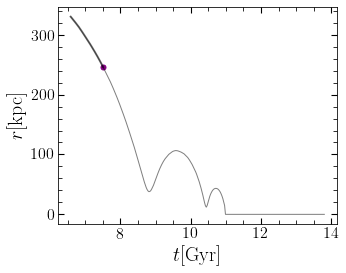

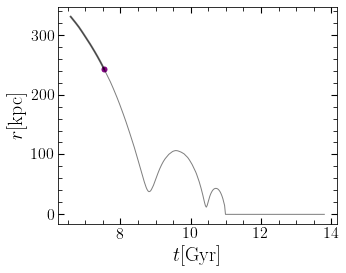

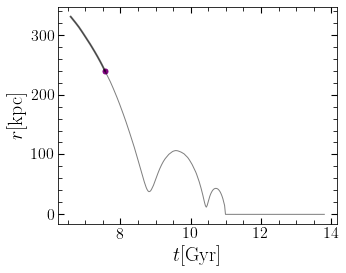

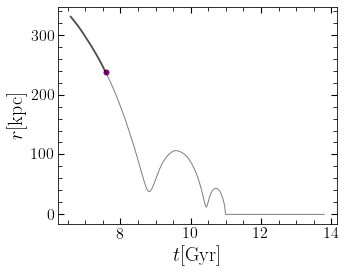

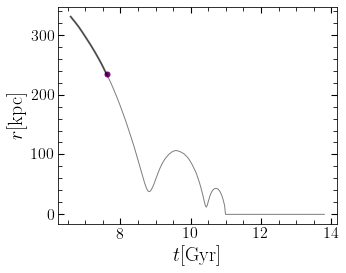

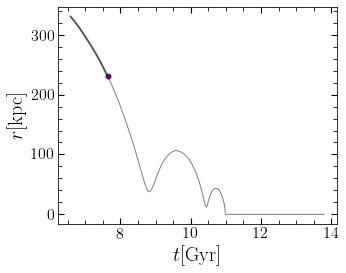

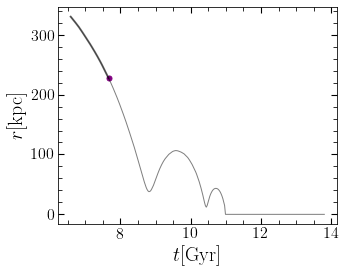

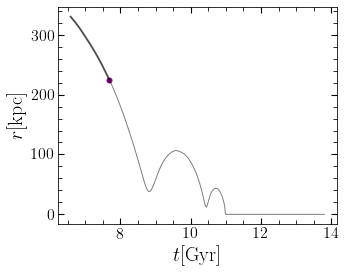

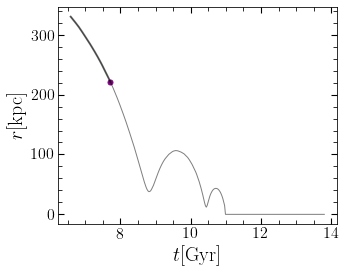

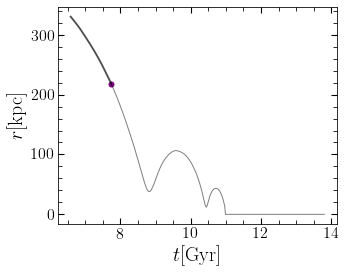

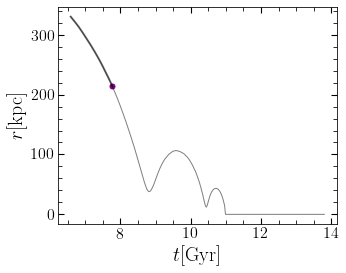

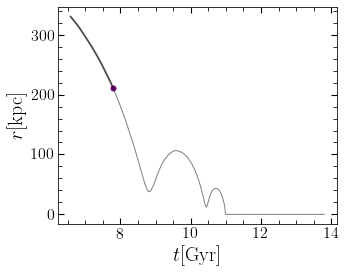

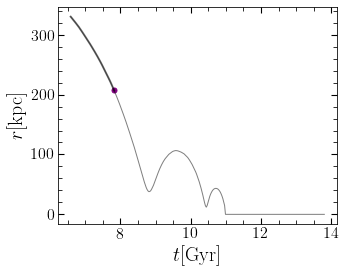

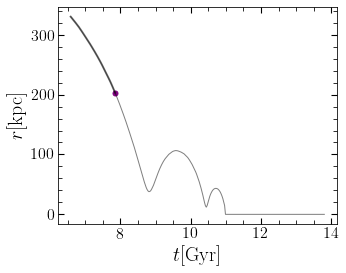

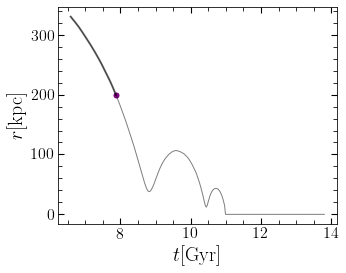

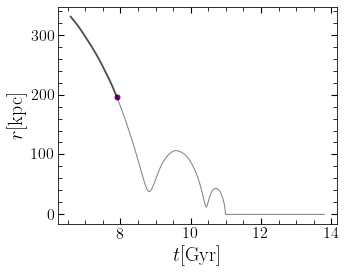

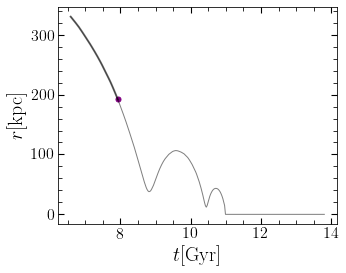

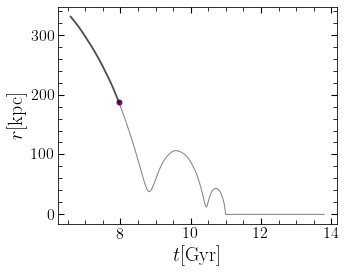

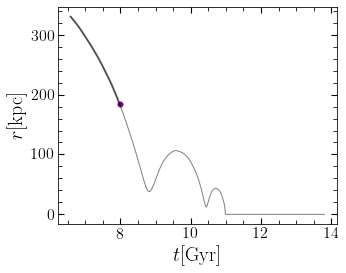

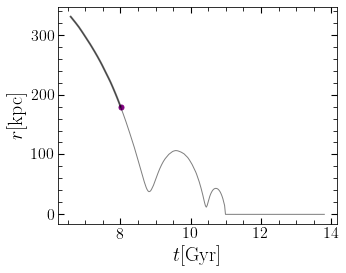

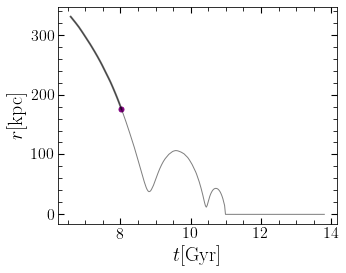

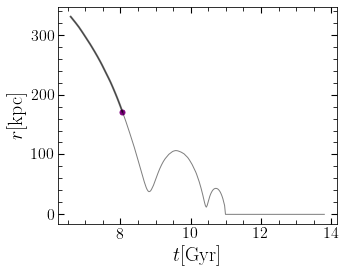

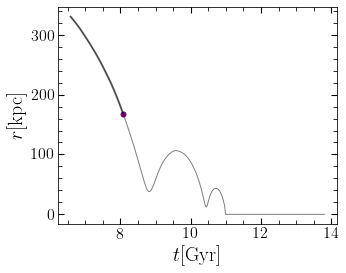

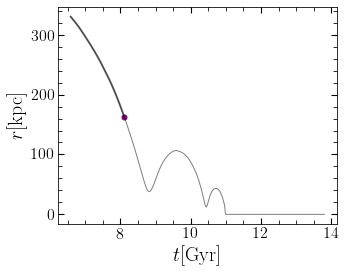

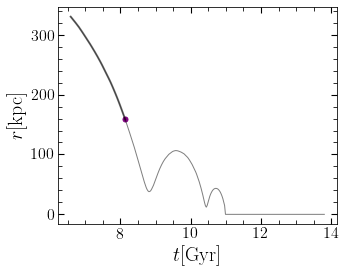

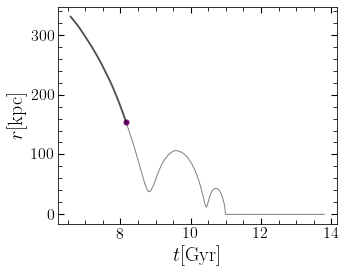

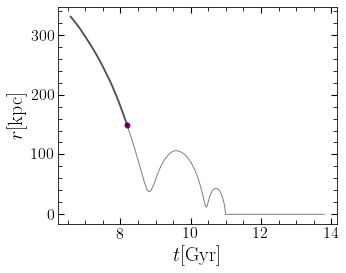

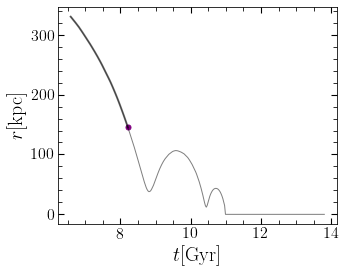

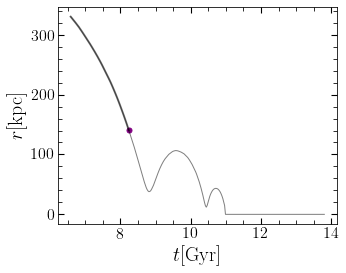

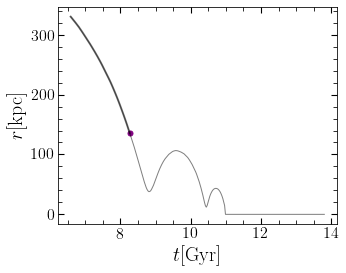

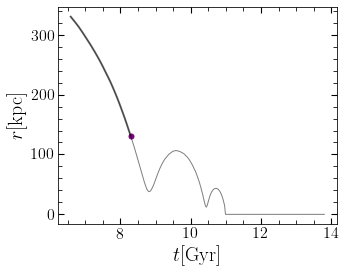

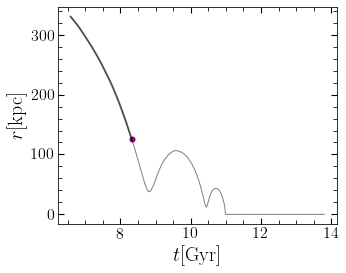

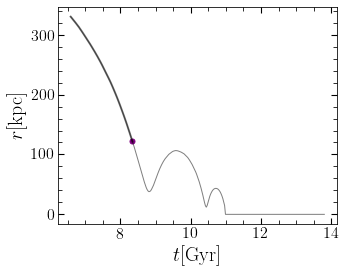

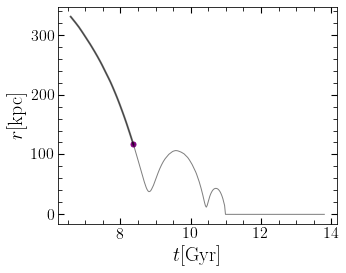

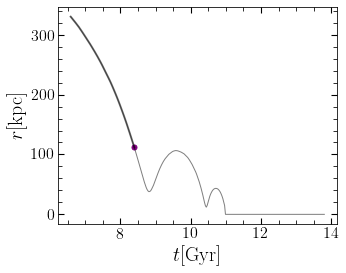

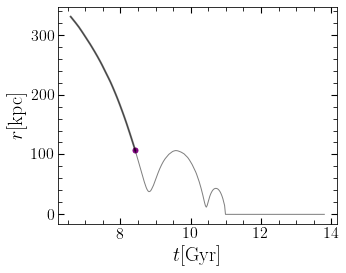

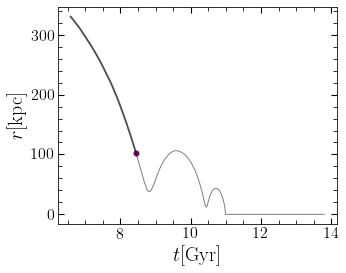

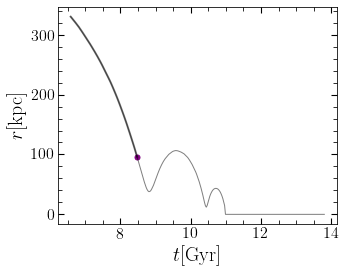

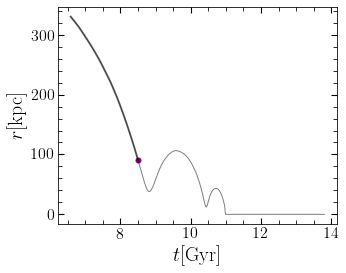

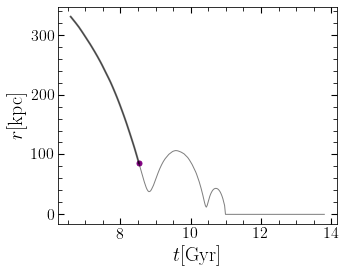

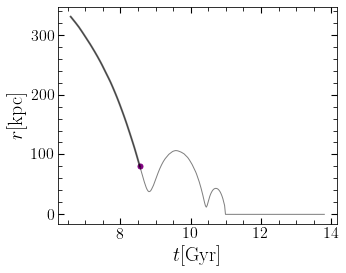

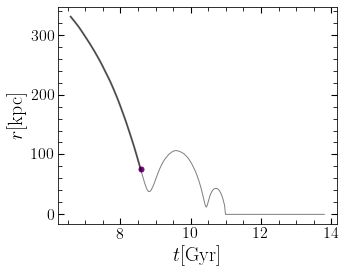

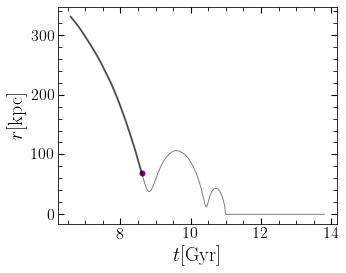

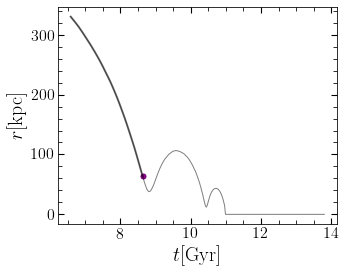

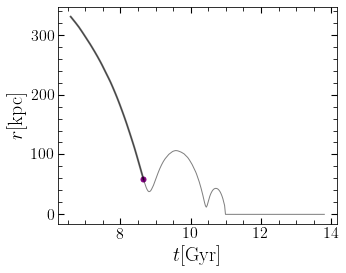

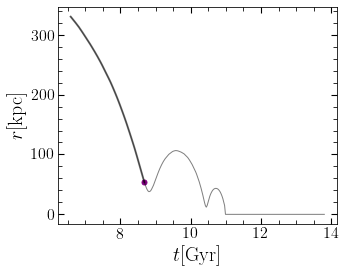

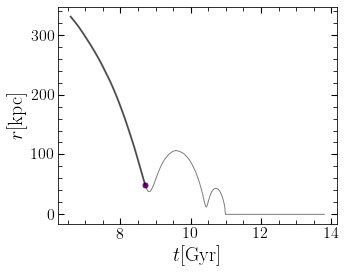

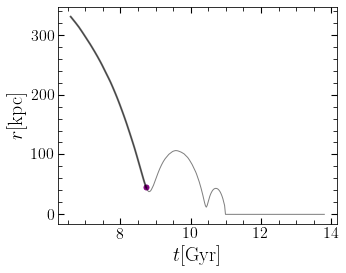

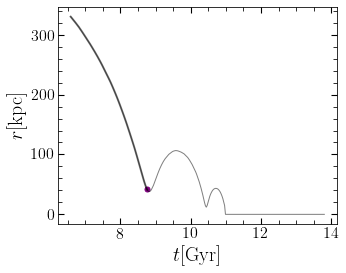

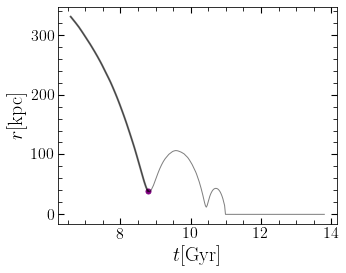

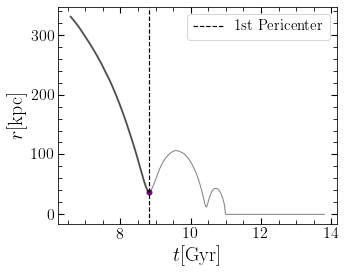

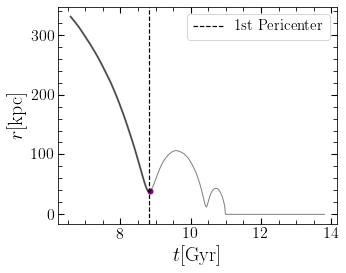

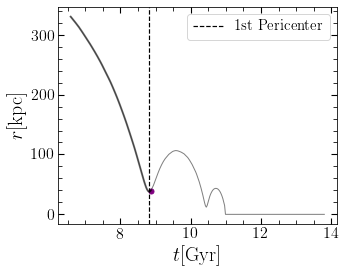

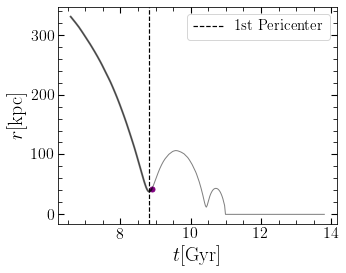

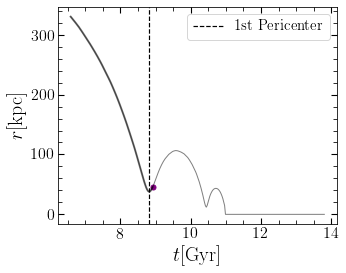

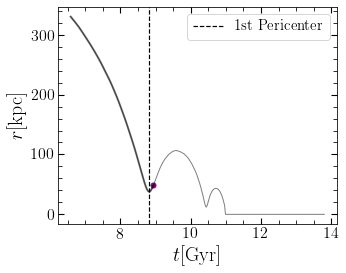

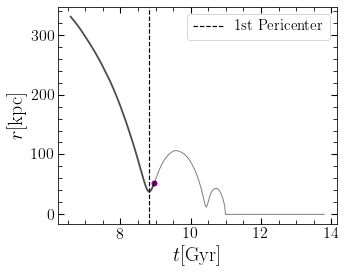

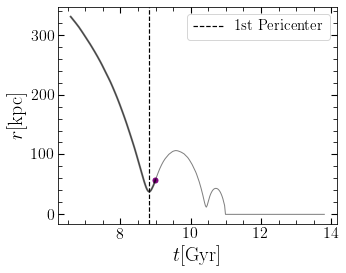

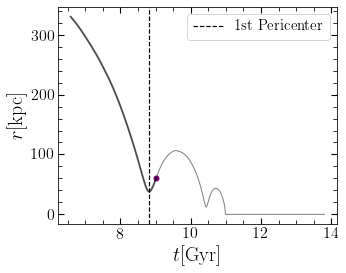

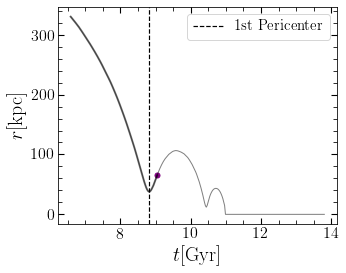

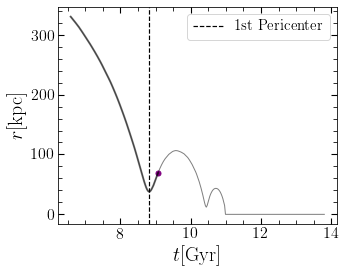

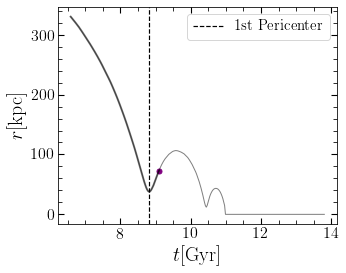

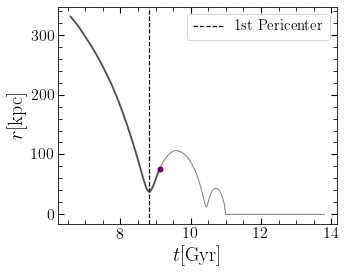

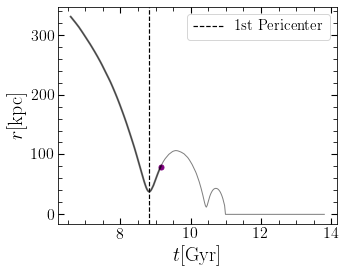

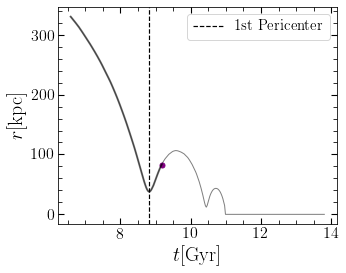

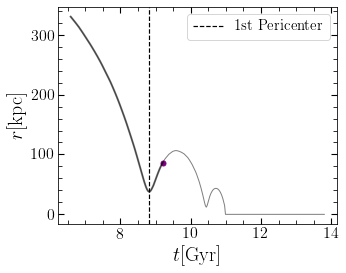

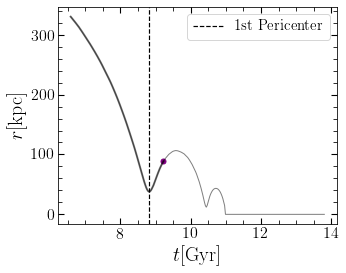

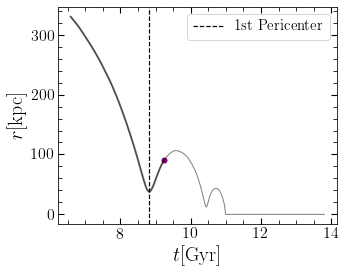

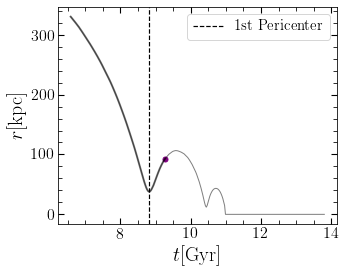

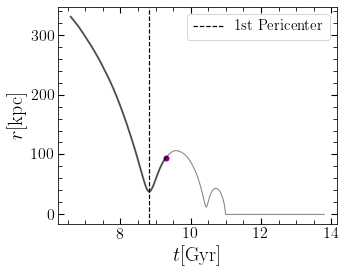

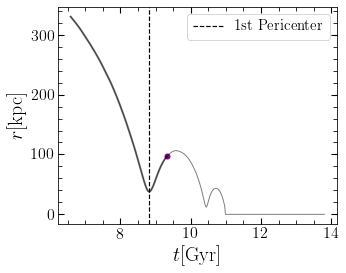

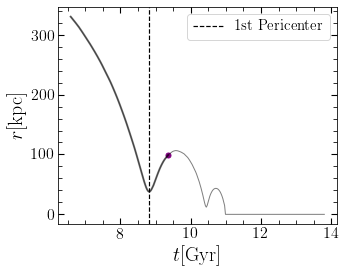

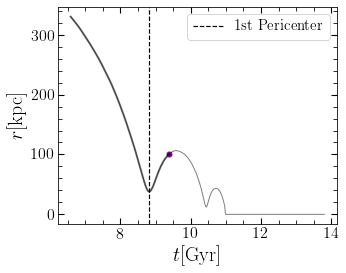

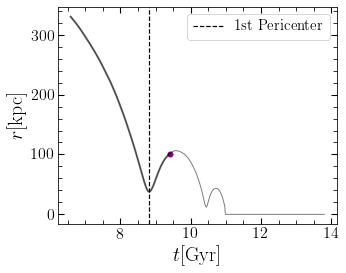

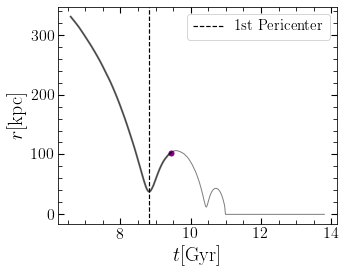

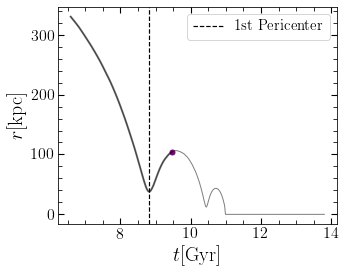

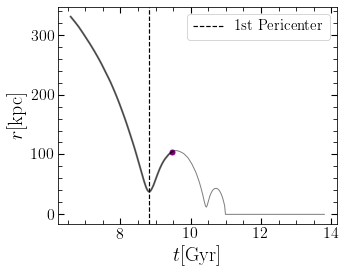

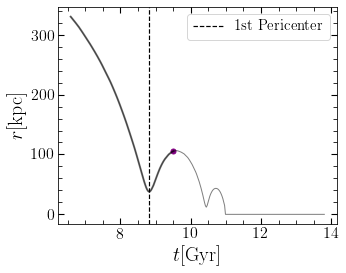

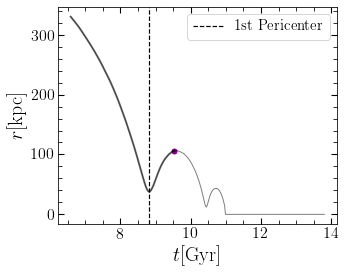

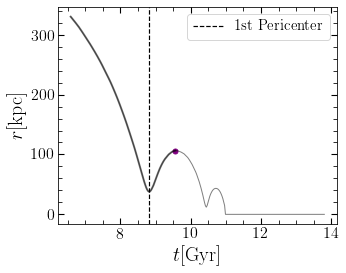

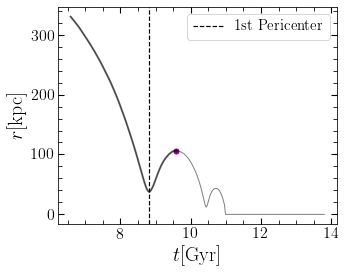

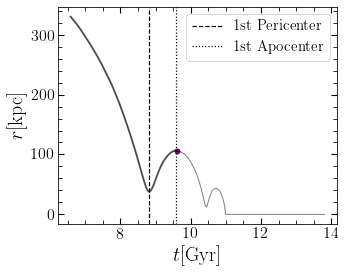

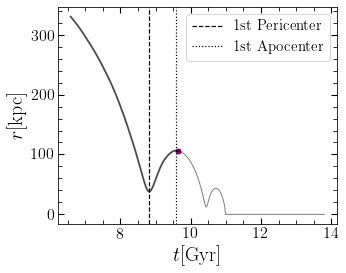

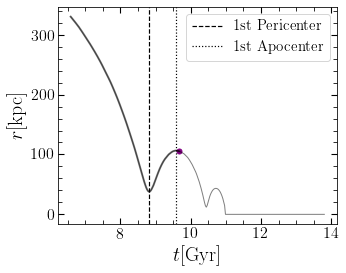

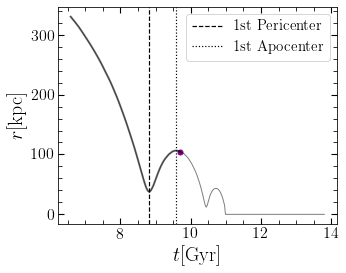

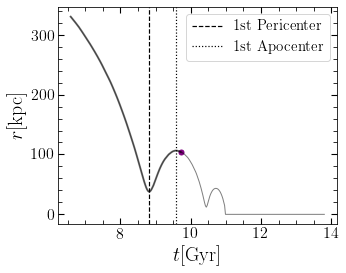

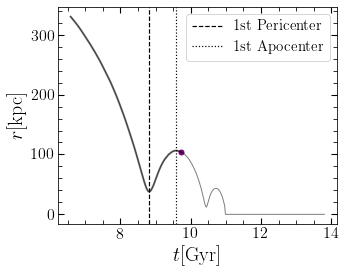

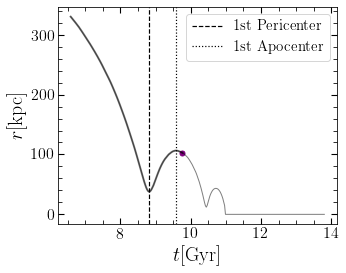

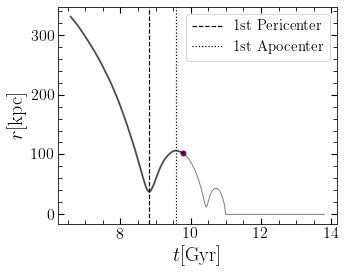

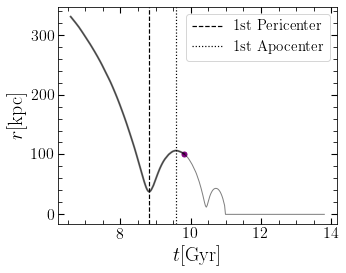

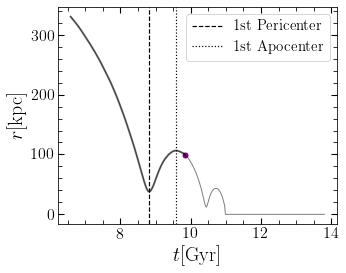

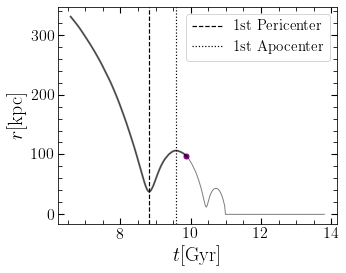

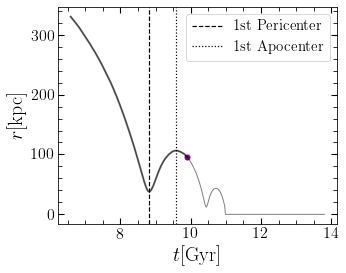

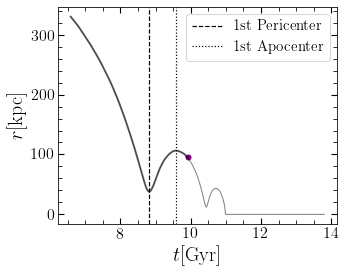

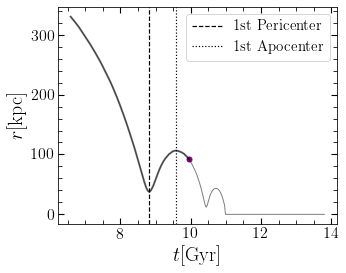

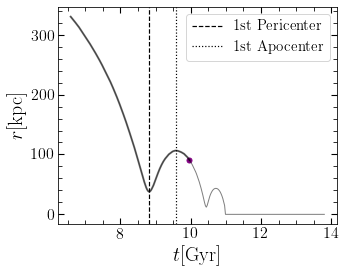

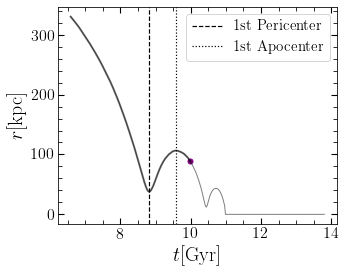

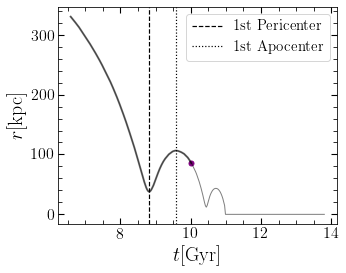

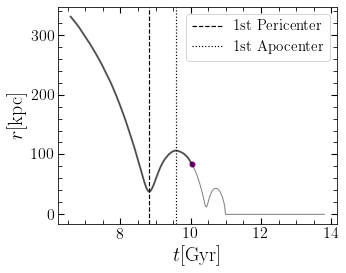

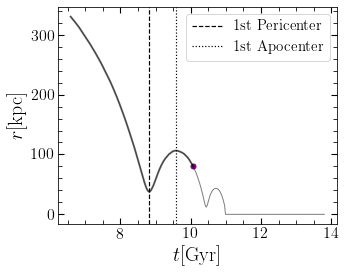

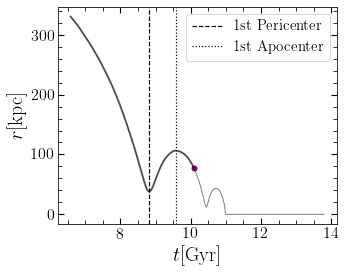

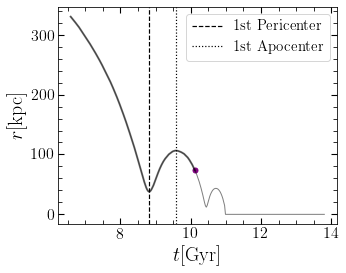

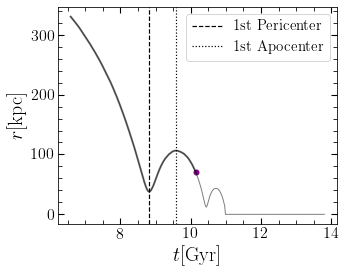

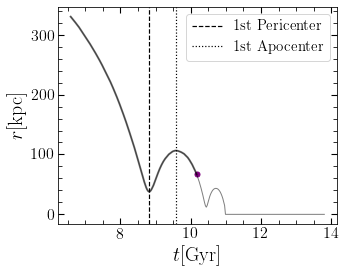

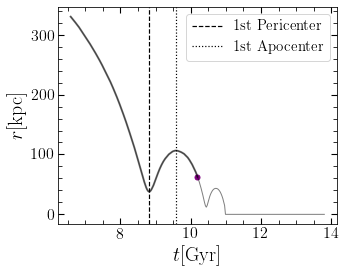

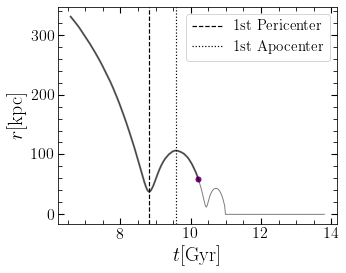

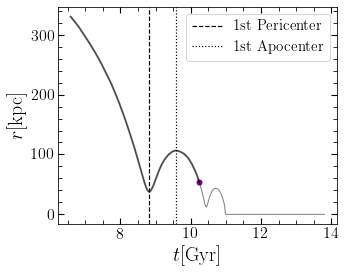

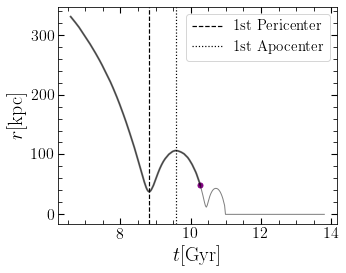

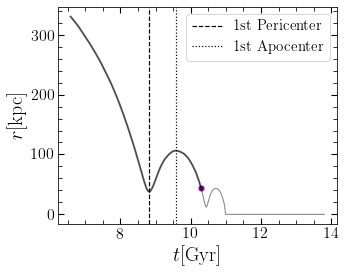

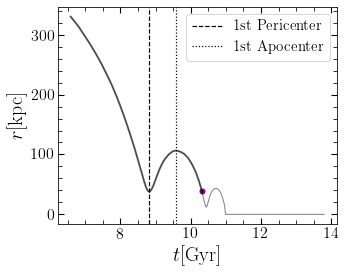

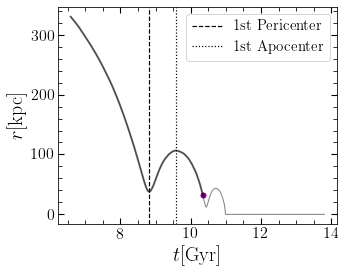

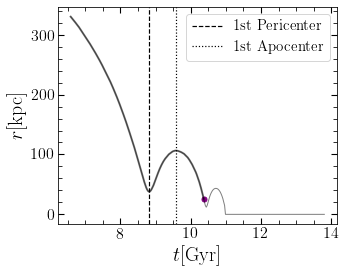

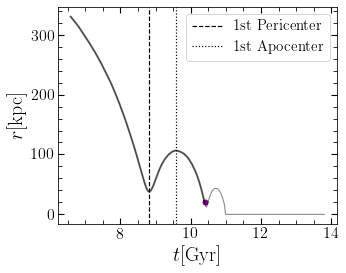

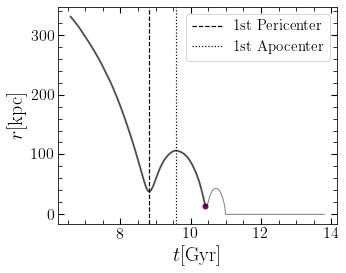

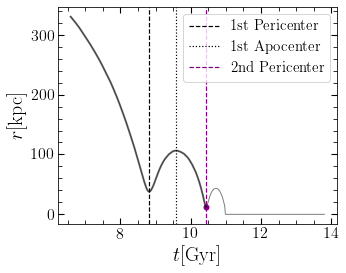

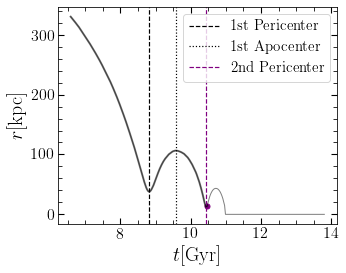

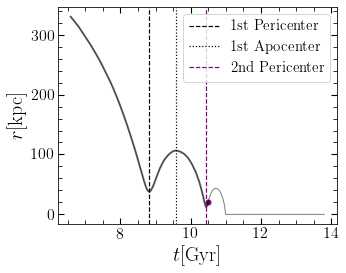

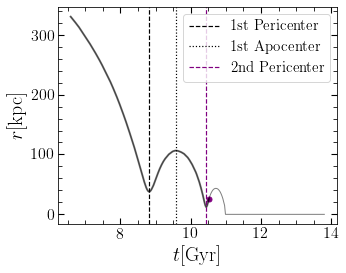

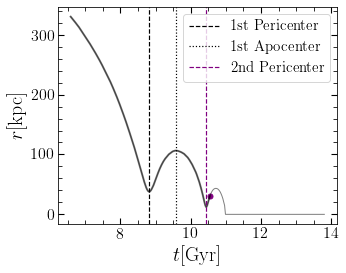

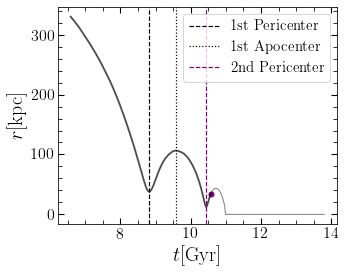

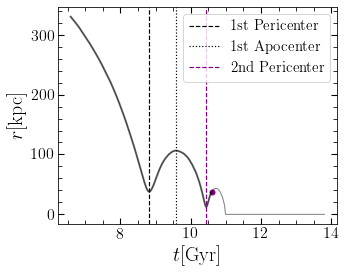

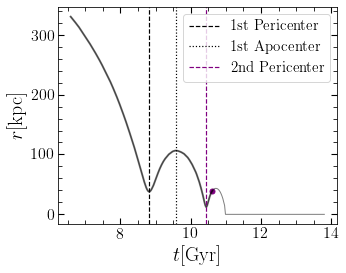

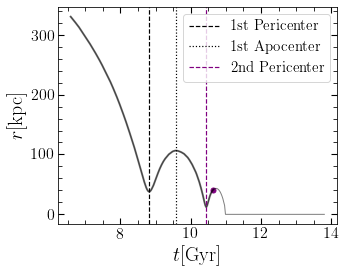

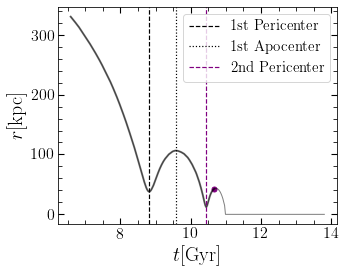

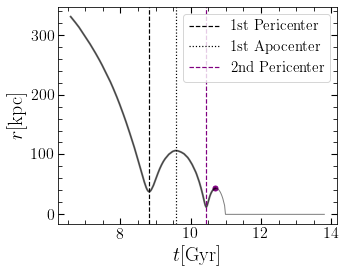

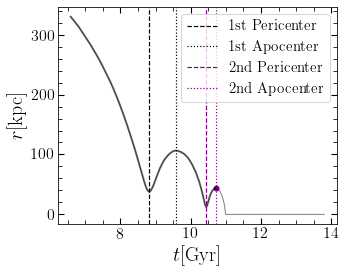

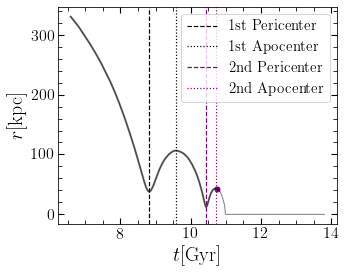

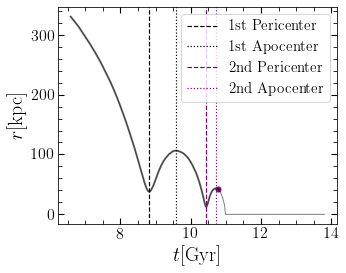

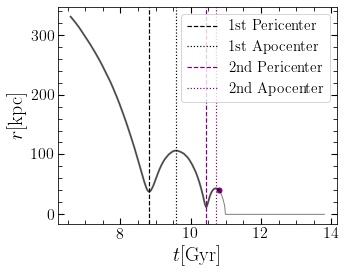

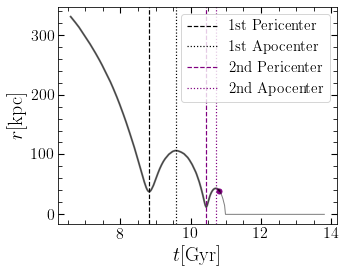

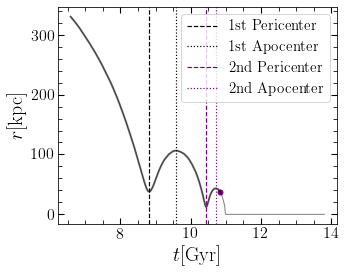

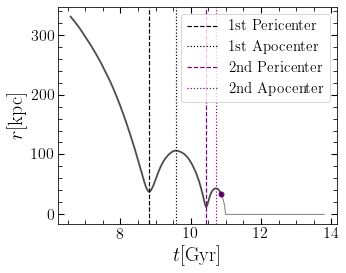

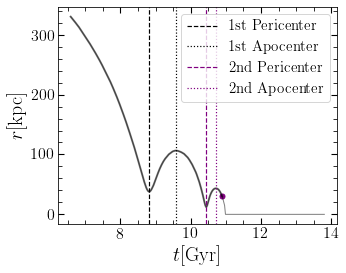

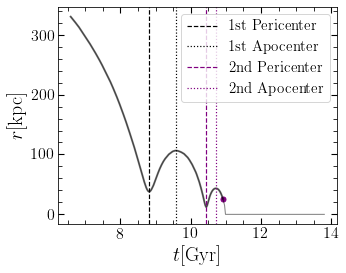

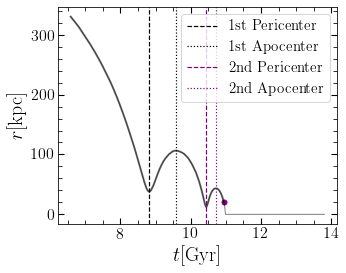

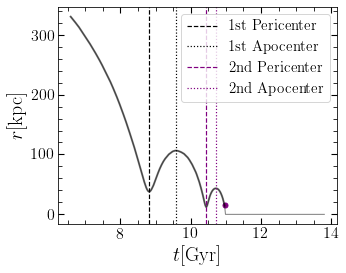

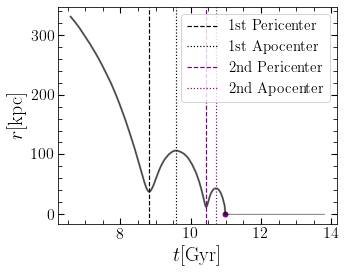

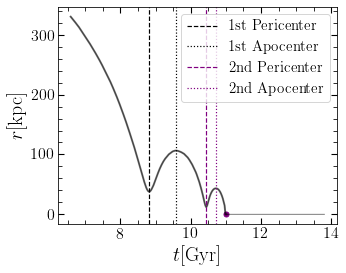

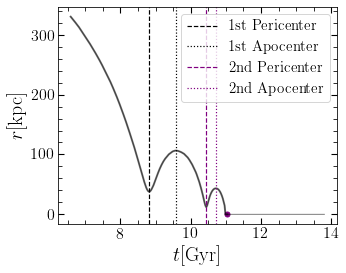

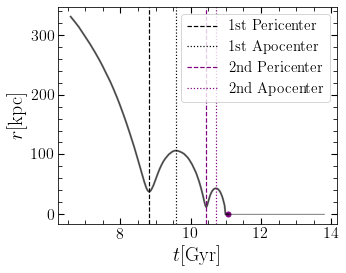

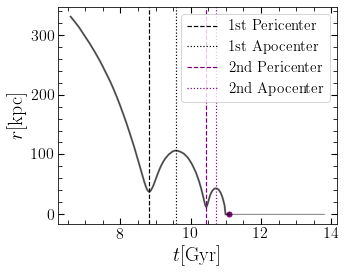

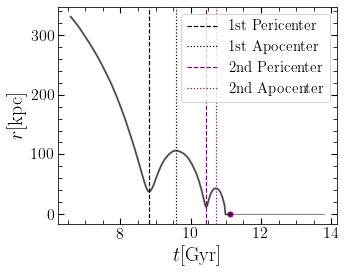

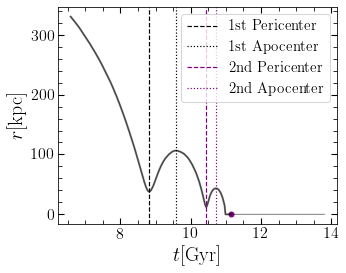

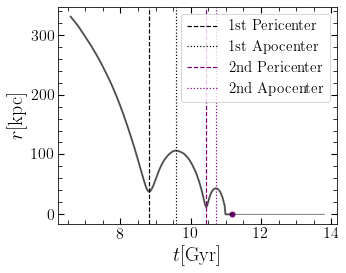

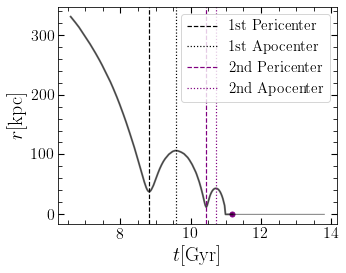

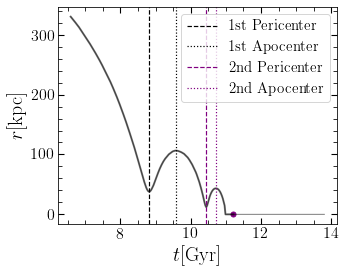

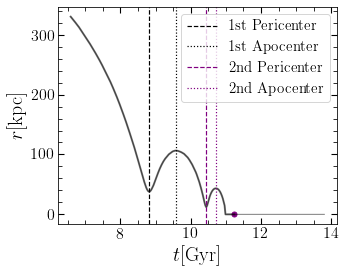

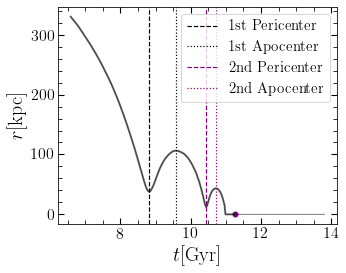

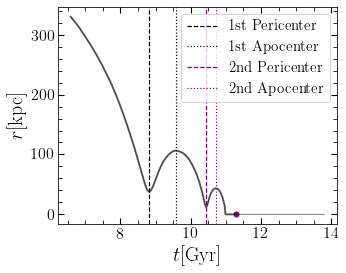

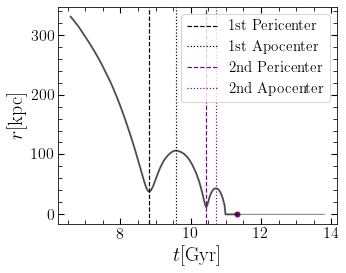

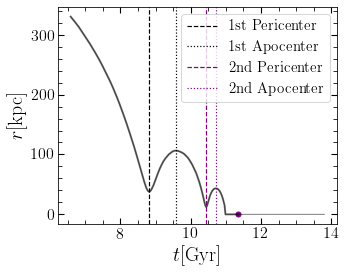

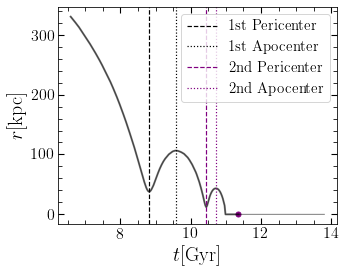

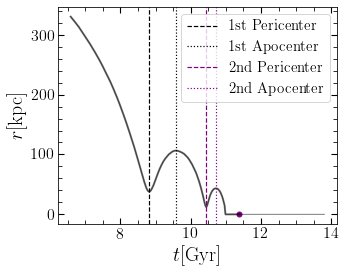

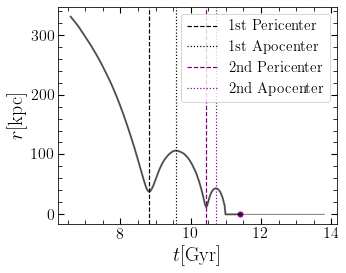

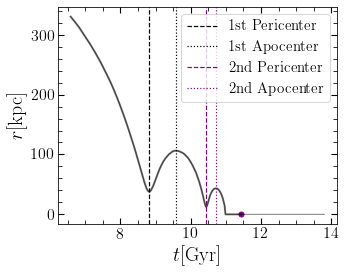

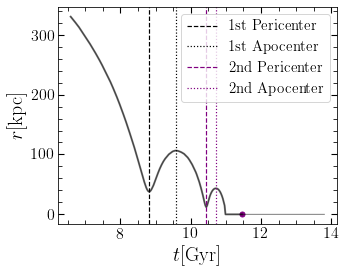

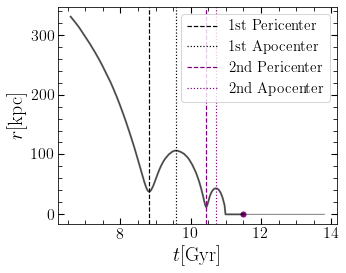

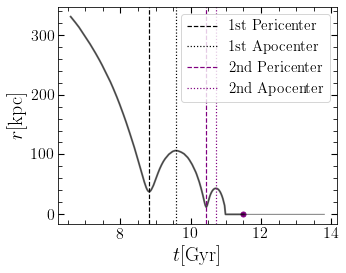

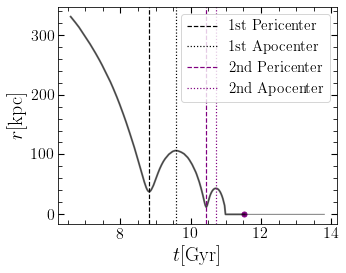

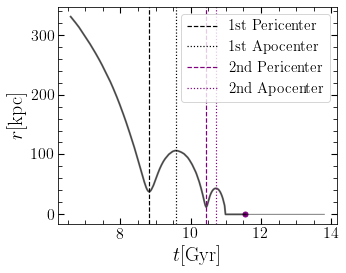

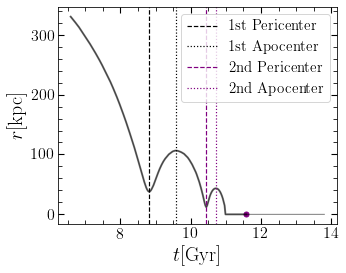

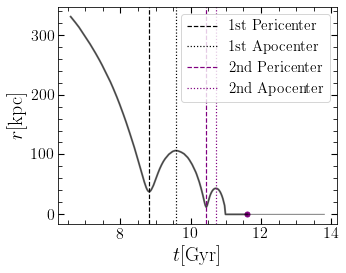

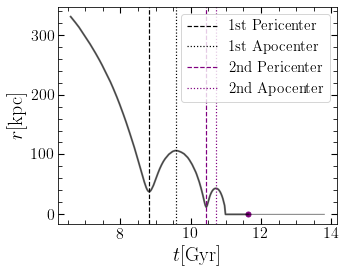

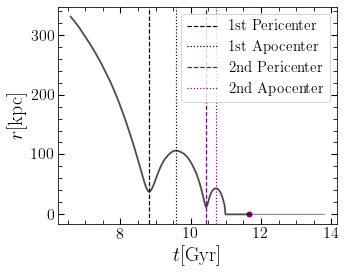

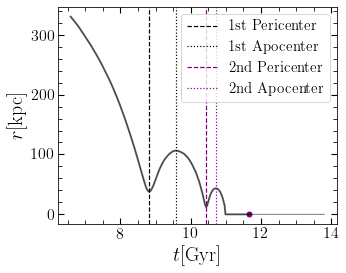

In [56]:
for k in range(300, 500):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharex=True)
    ax.plot(times[300:], np.sqrt(np.sum((satellite_faceon['pos'])**2, axis=1)), c='k', alpha=0.5, lw=1)
    ax.plot(times[300:k+1], np.sqrt(np.sum((satellite_faceon['pos'])**2, axis=1))[:k-300+1], c='k', alpha=0.5, lw=2)

    ax.scatter(times[k], np.sqrt(np.sum((satellite_faceon['pos'])**2, axis=1))[k-300], c='purple', alpha=1)

    if k >384:
        ax.axvline(times[385], c='k', lw=1.2, ls='--', label=r'$\rm{1st\ Pericenter}$')
    if k>415:
        ax.axvline(times[415], c='k', lw=1.2, ls=':', label=r'$\rm{1st\ Apocenter}$')
    if k>448:
        ax.axvline(times[449], c='purple', lw=1.2, ls='--', label=r'$\rm{2nd\ Pericenter}$')
    if k>459:
        ax.axvline(times[460], c='purple', lw=1.2, ls=':' , label=r'$\rm{2nd\ Apocenter}$')
    ax.set_ylabel(r'$r\rm{[kpc]}$')
    ax.set_xlabel(r'$t\rm{[Gyr]}$')

    if k>384:
        ax.legend(fontsize=15)

    #plt.grid()
    plt.savefig('../plots/exploration/m12b_sat_orbit_{:03d}.png'.format(k), bbox_inches='tight', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

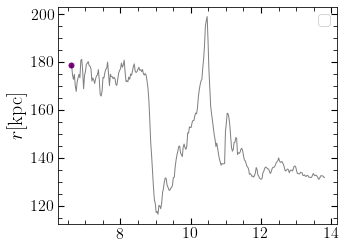

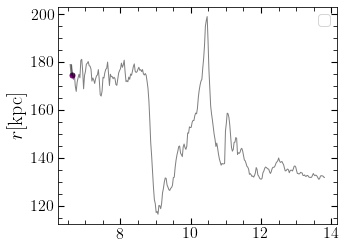

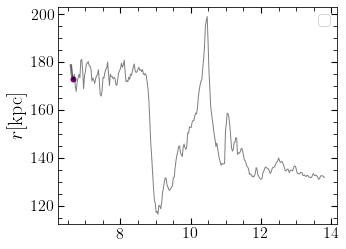

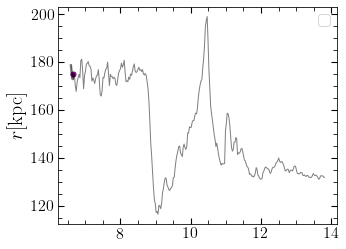

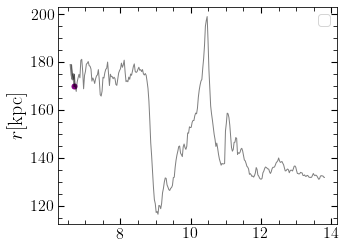

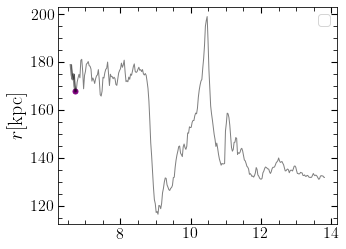

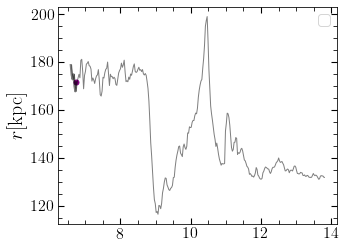

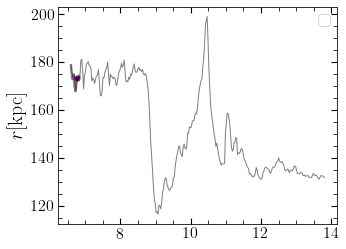

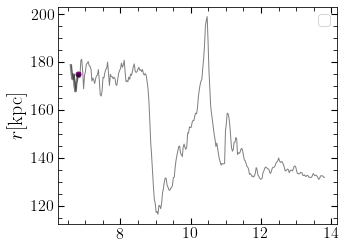

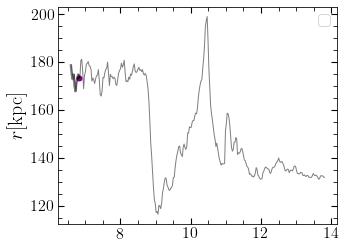

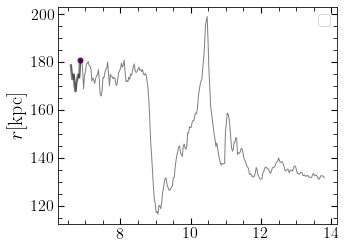

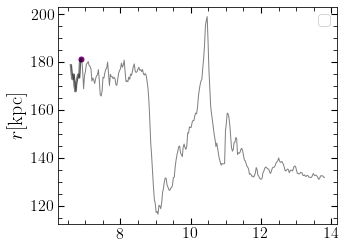

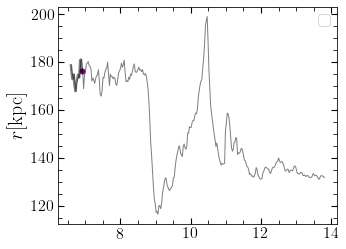

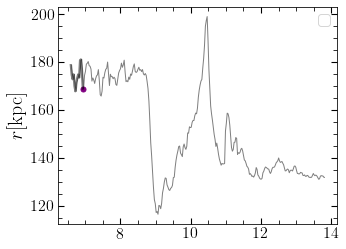

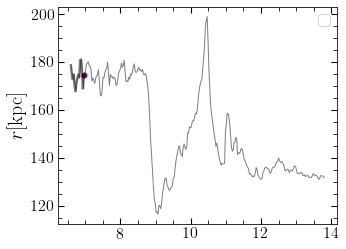

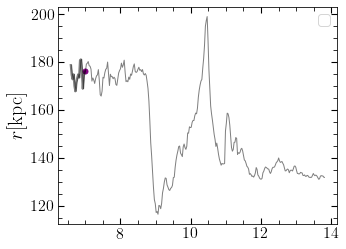

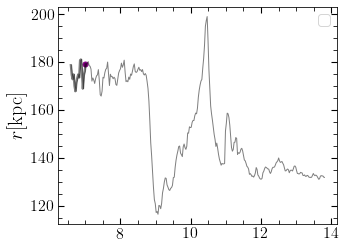

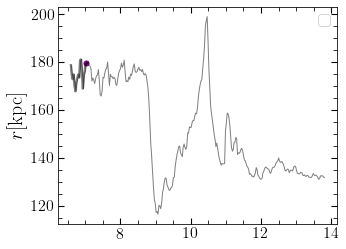

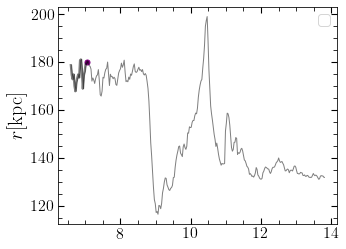

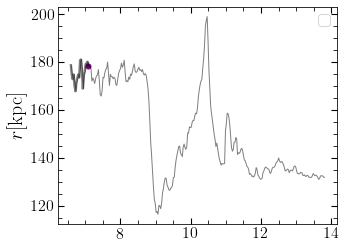

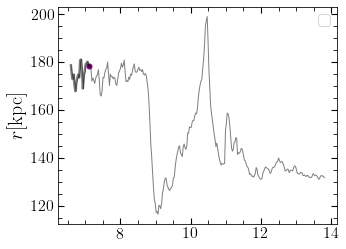

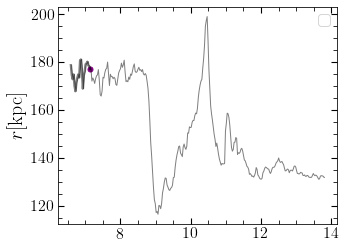

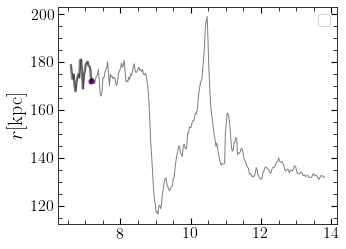

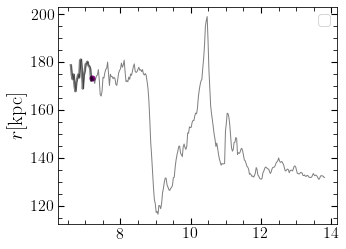

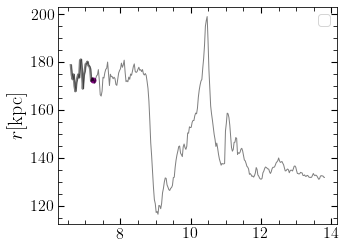

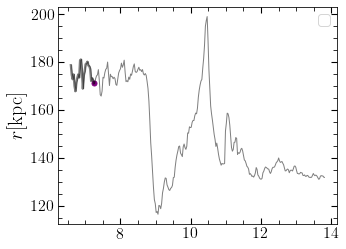

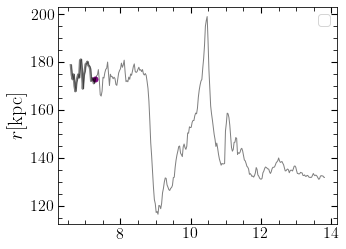

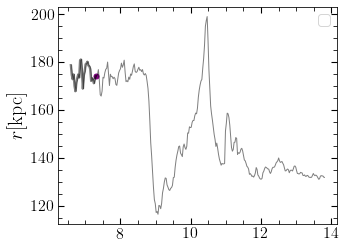

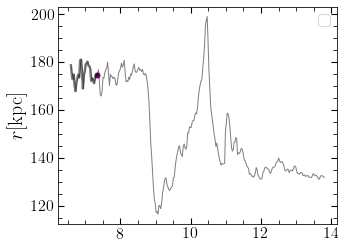

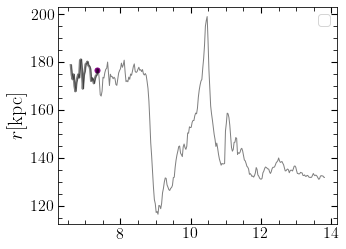

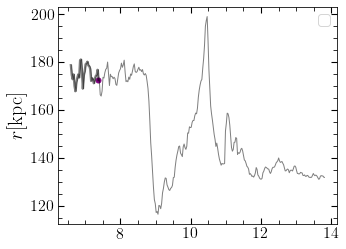

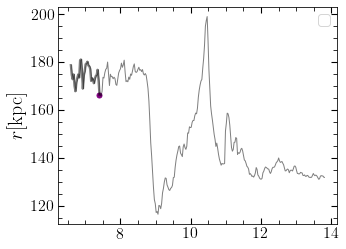

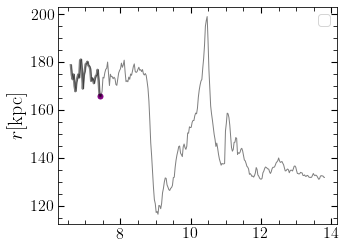

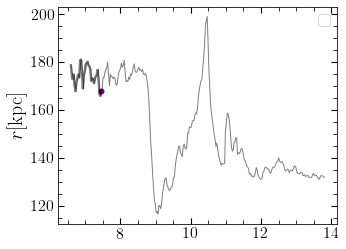

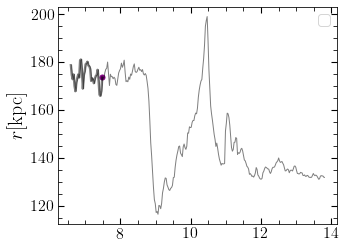

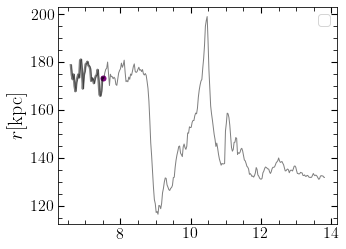

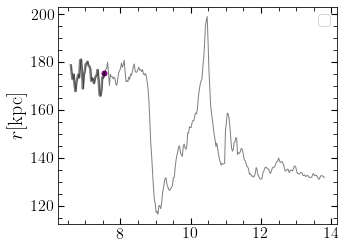

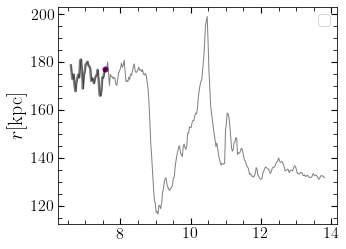

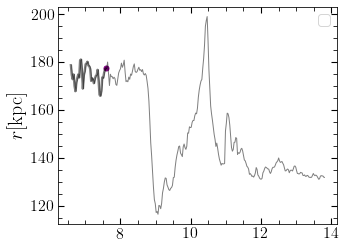

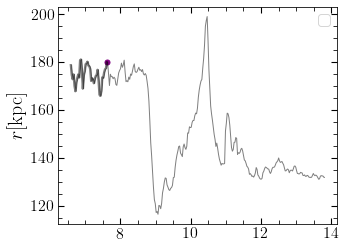

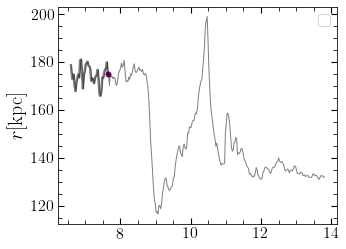

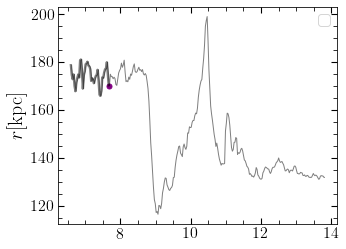

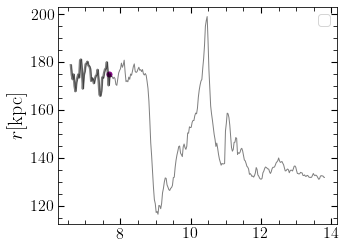

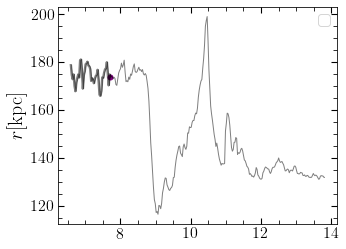

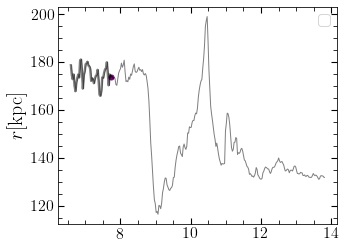

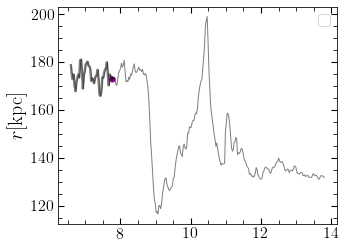

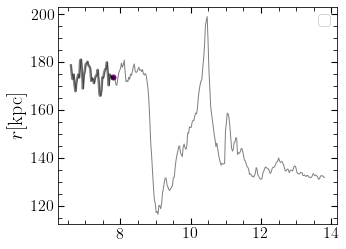

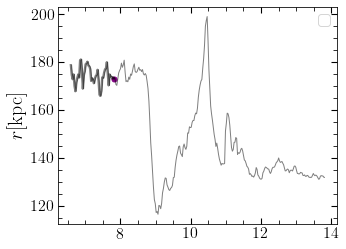

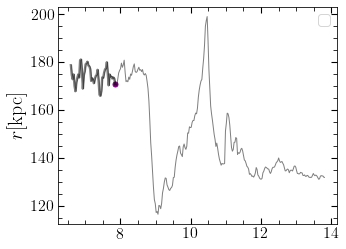

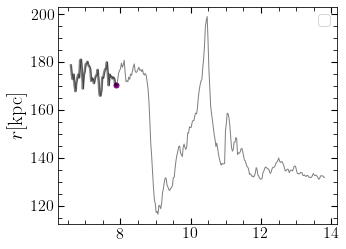

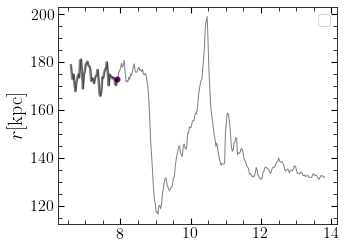

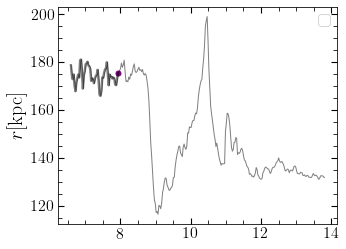

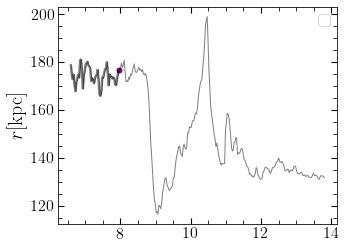

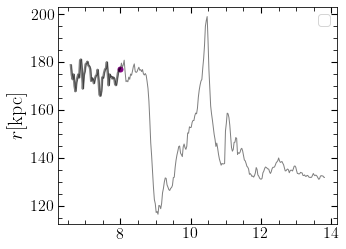

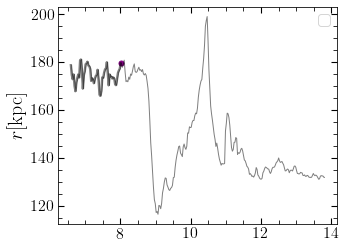

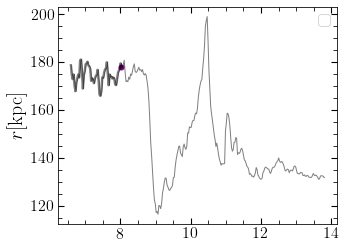

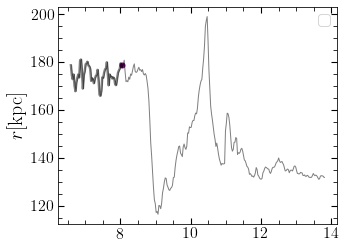

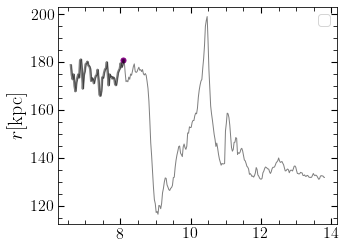

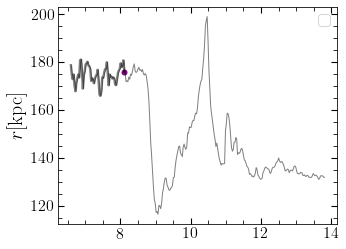

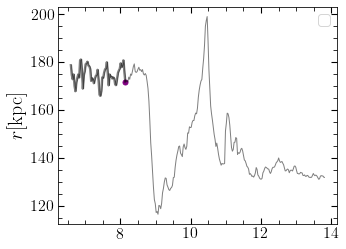

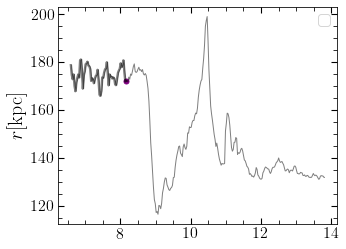

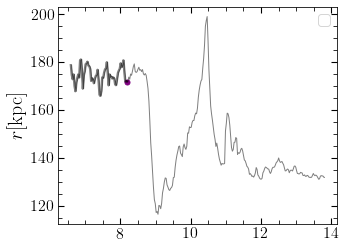

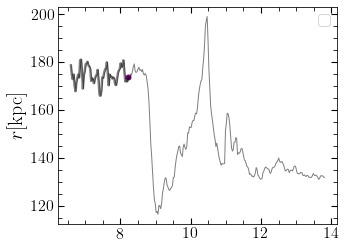

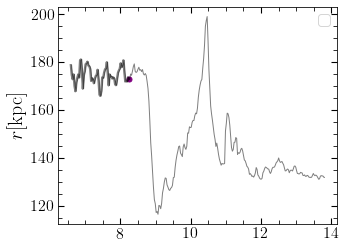

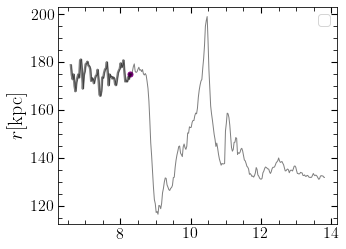

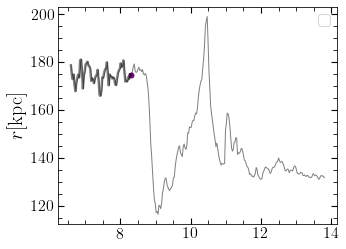

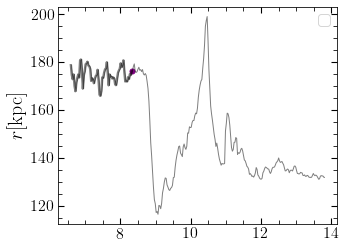

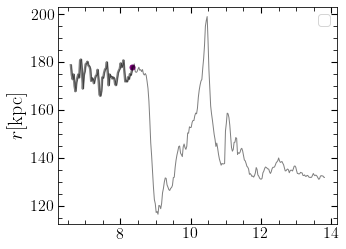

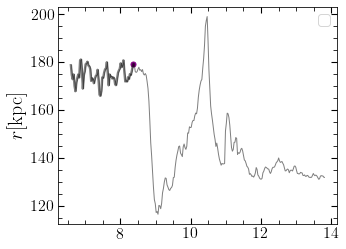

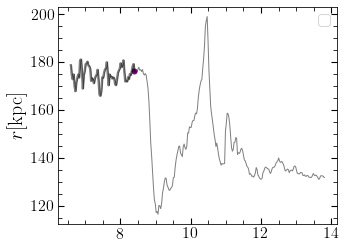

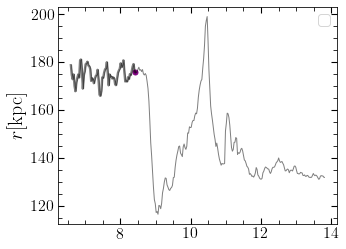

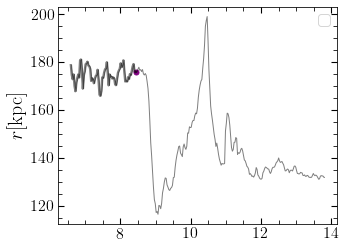

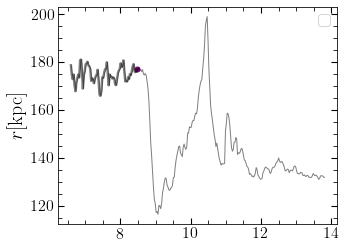

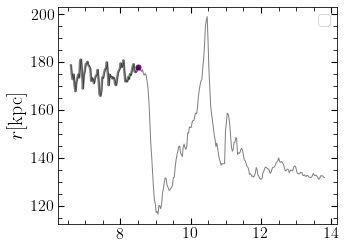

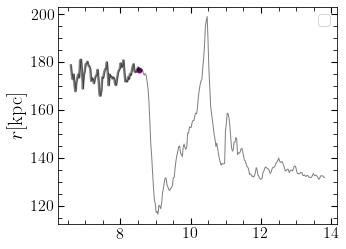

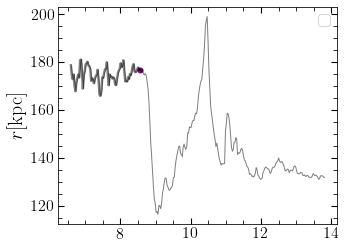

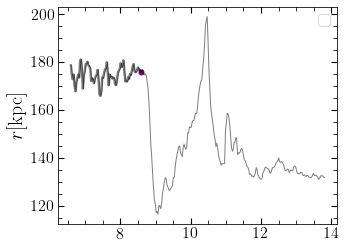

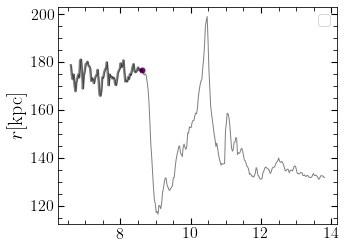

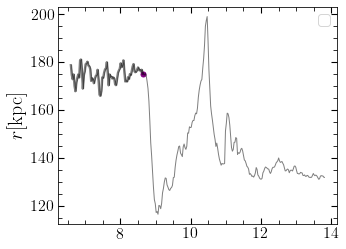

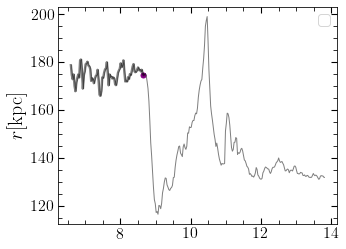

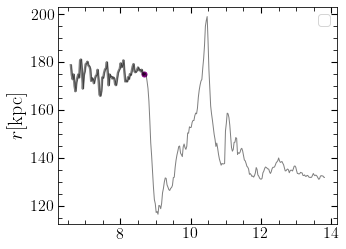

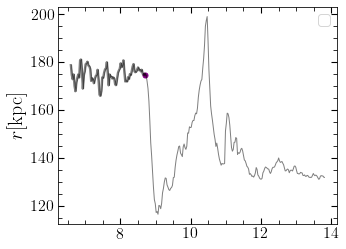

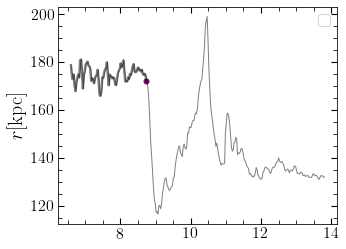

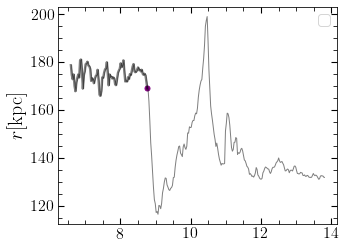

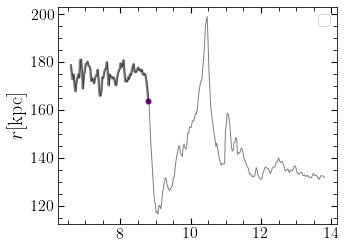

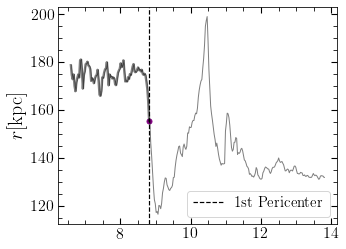

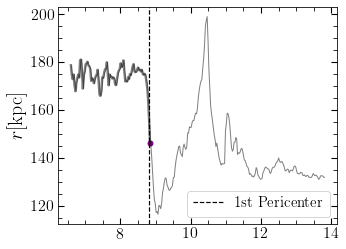

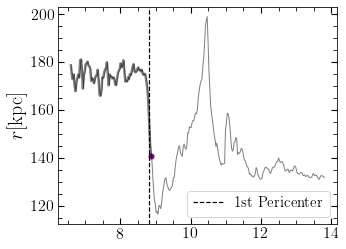

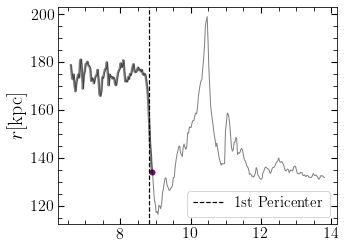

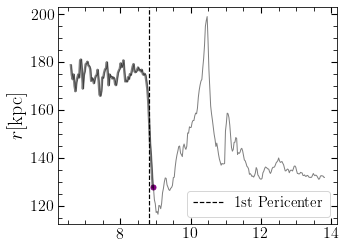

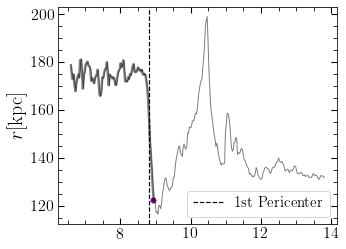

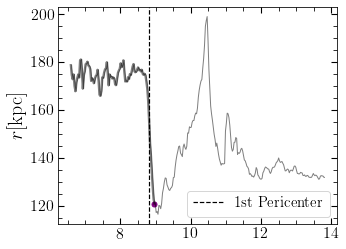

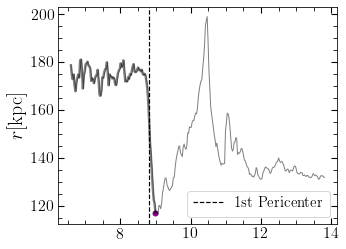

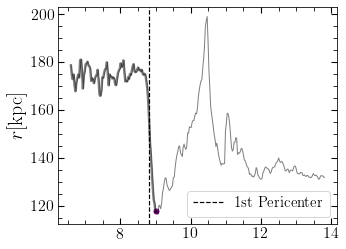

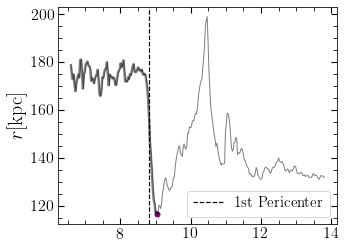

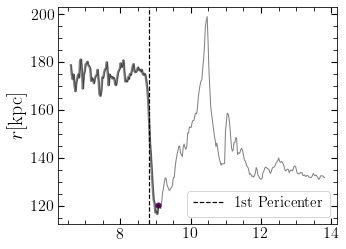

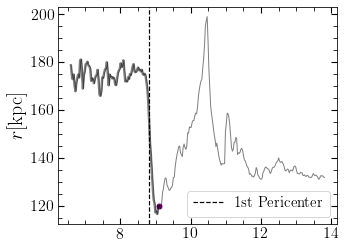

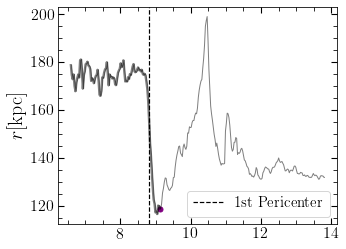

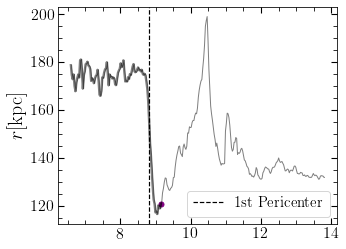

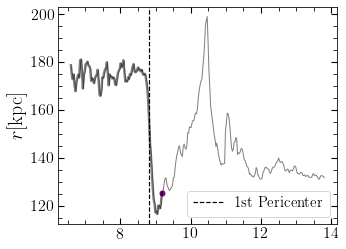

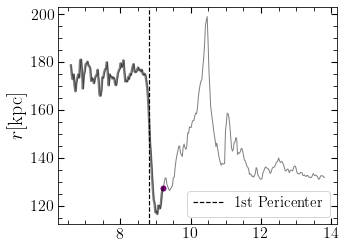

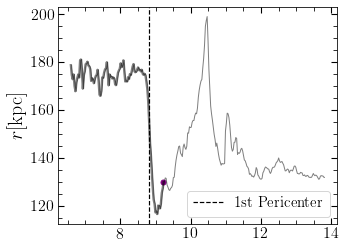

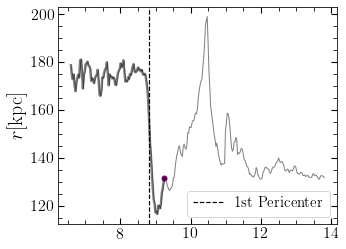

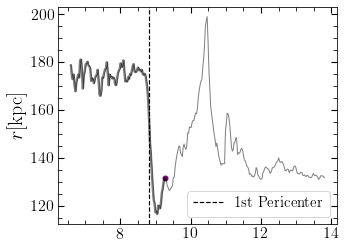

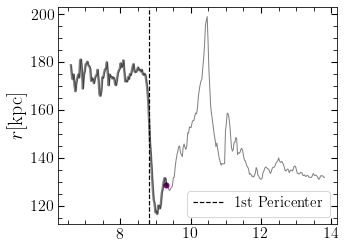

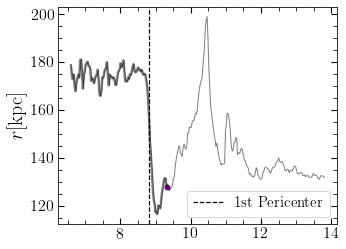

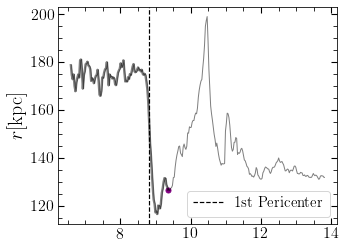

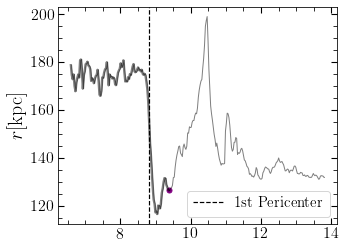

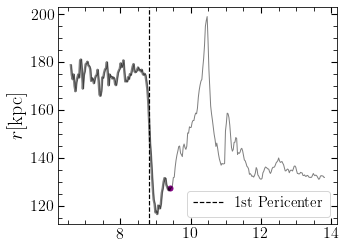

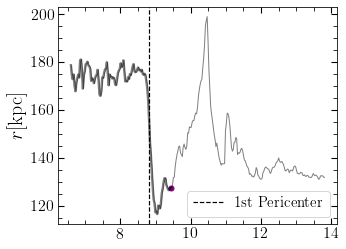

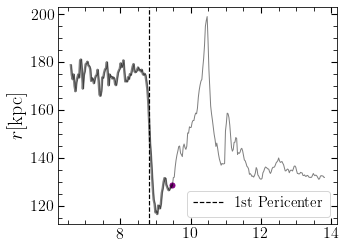

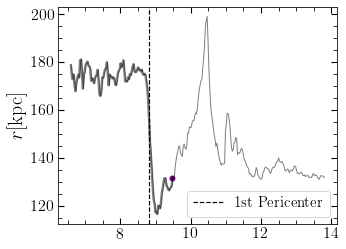

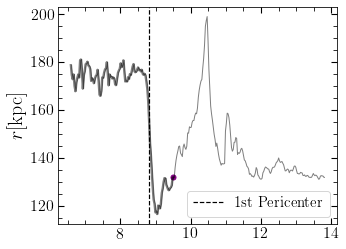

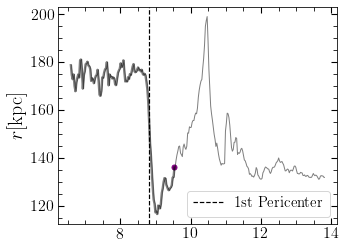

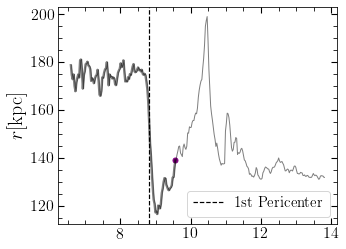

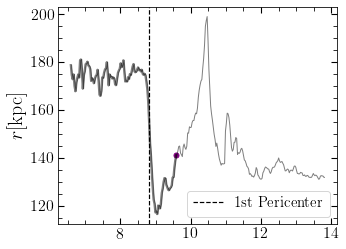

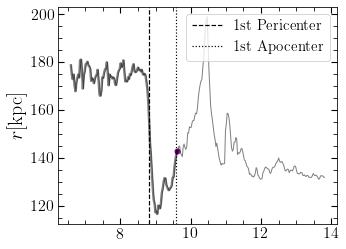

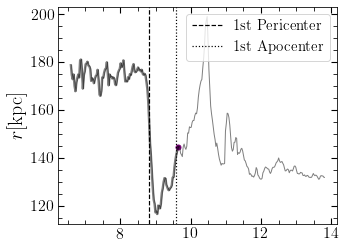

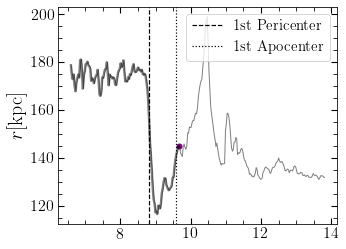

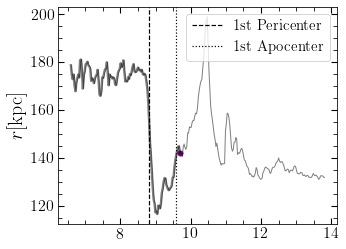

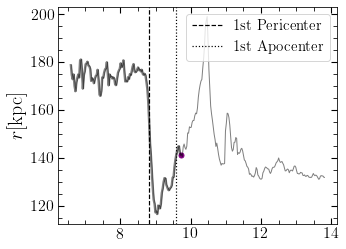

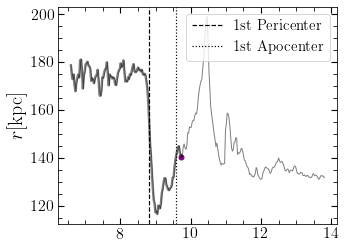

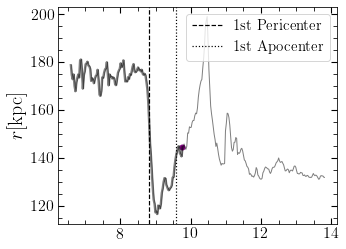

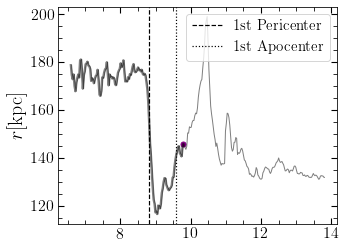

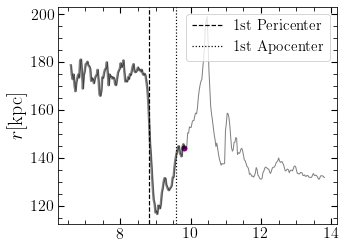

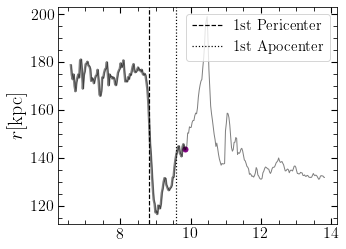

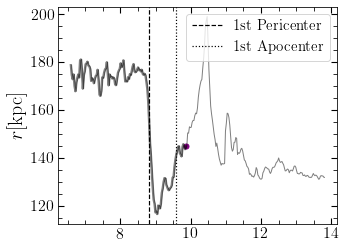

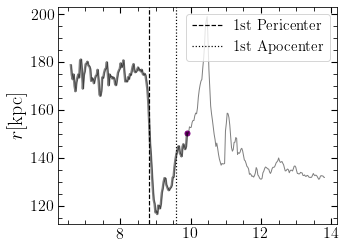

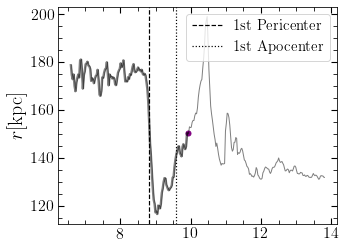

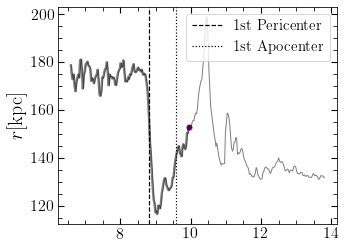

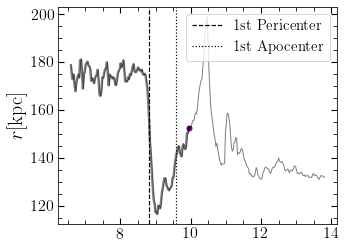

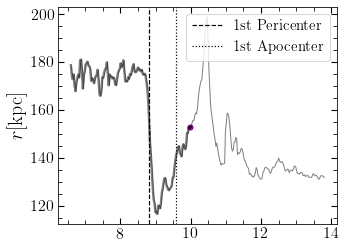

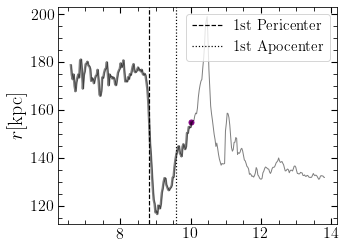

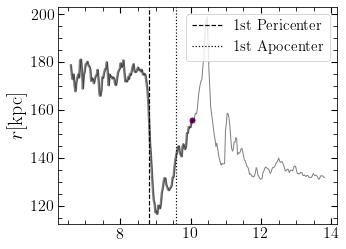

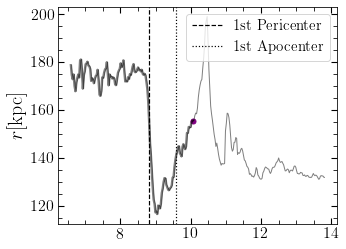

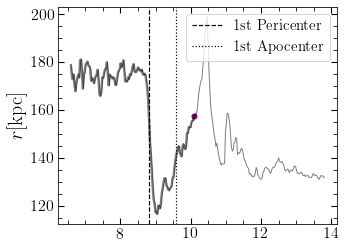

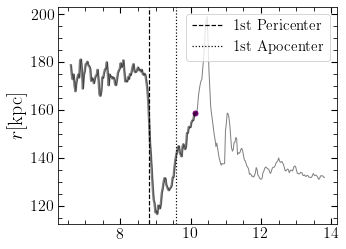

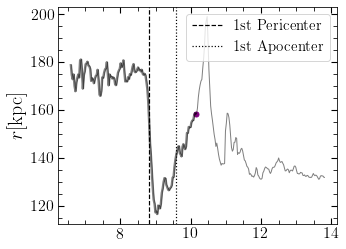

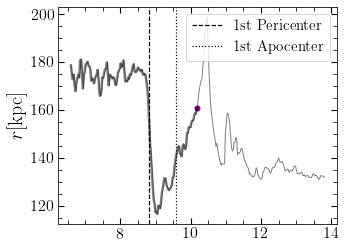

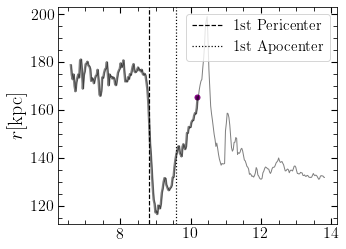

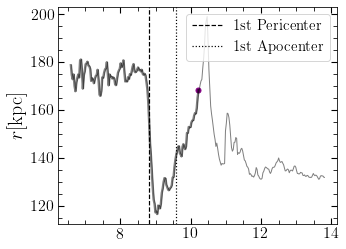

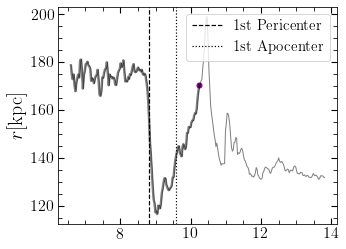

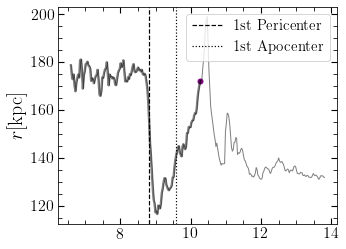

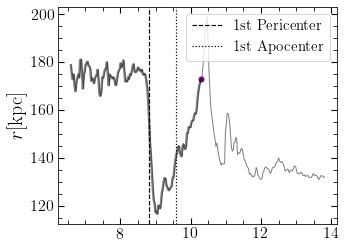

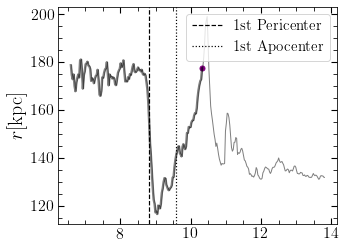

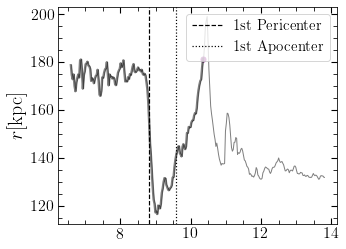

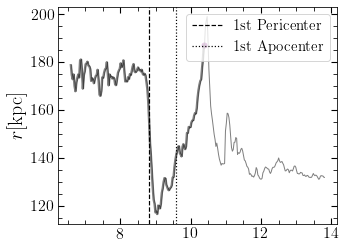

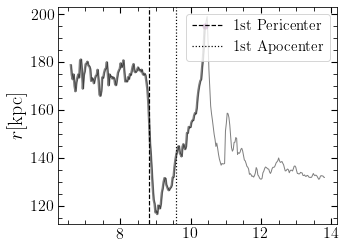

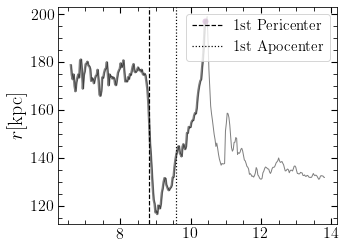

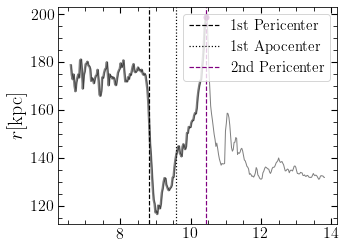

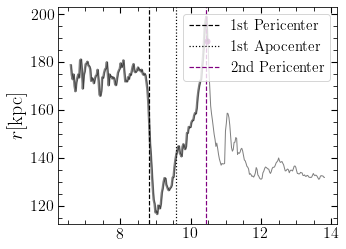

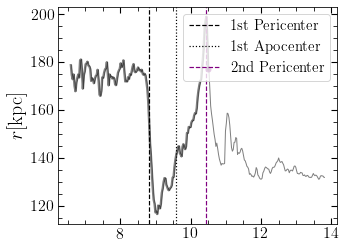

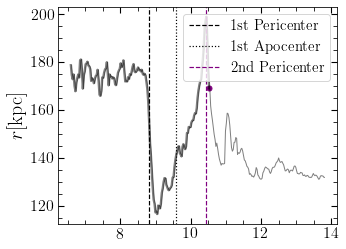

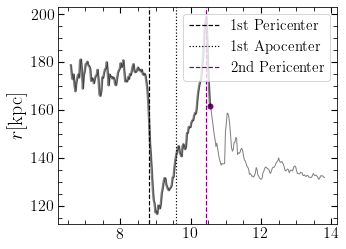

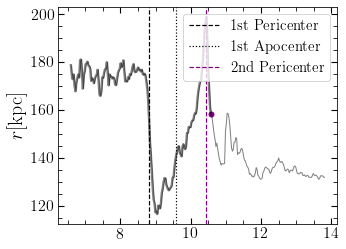

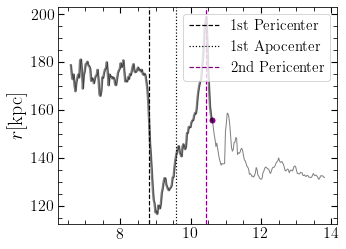

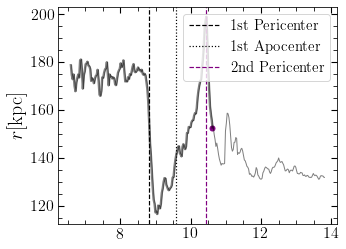

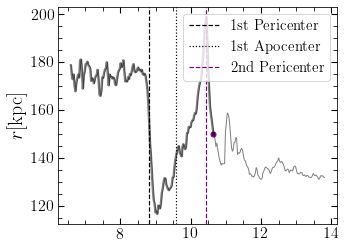

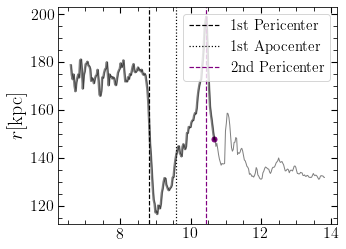

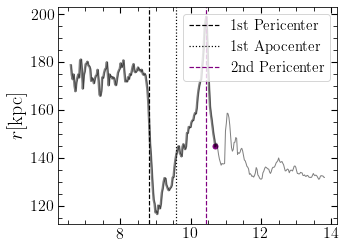

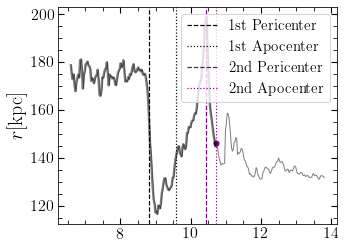

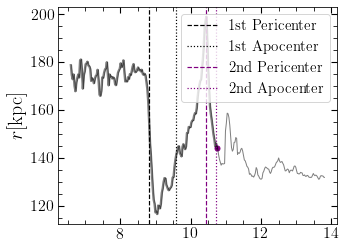

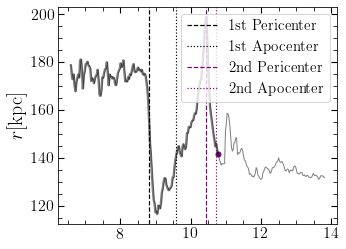

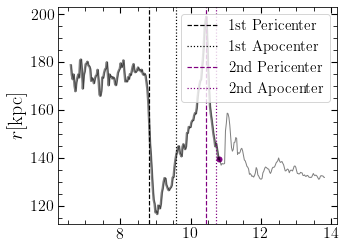

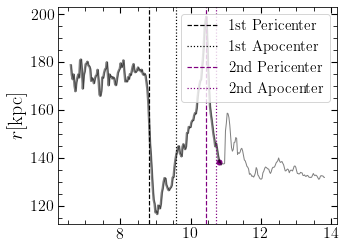

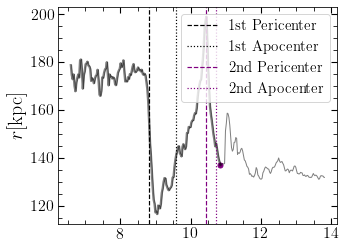

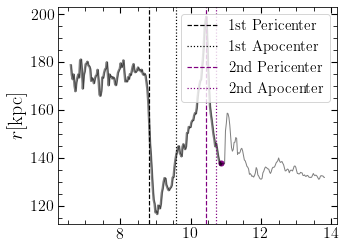

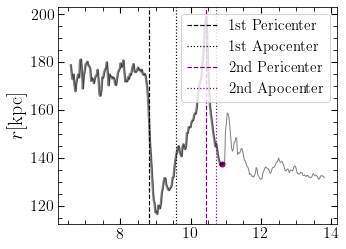

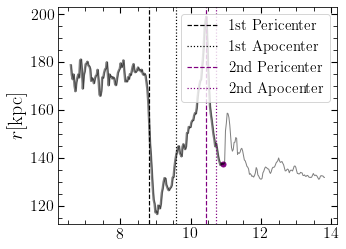

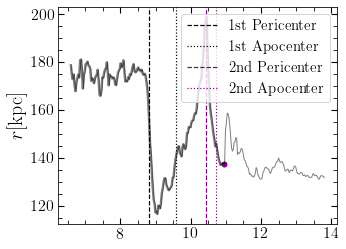

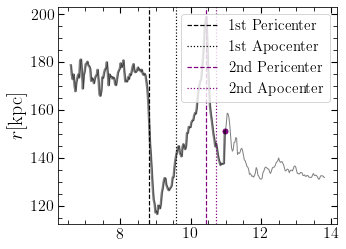

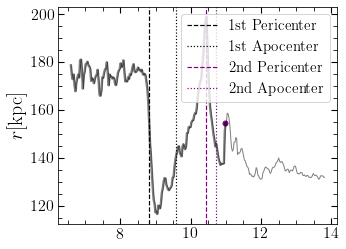

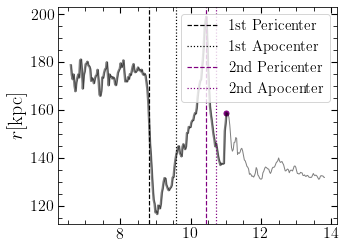

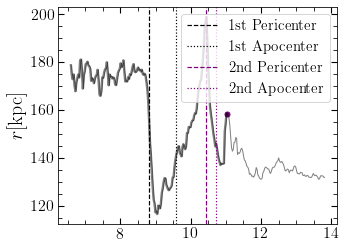

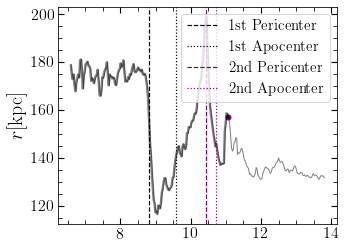

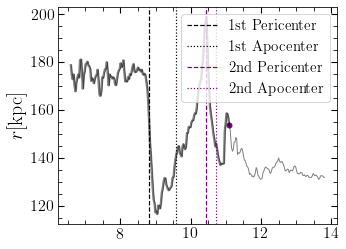

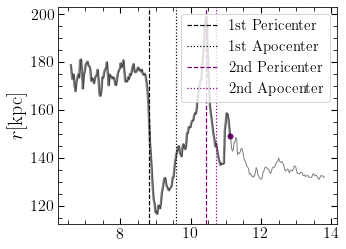

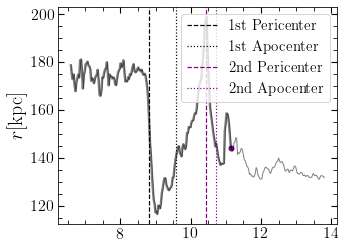

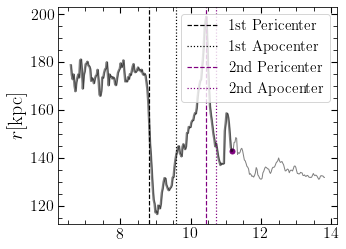

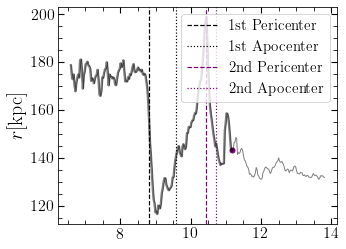

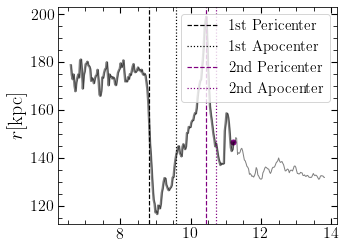

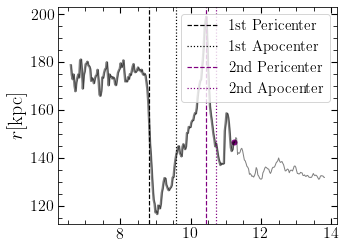

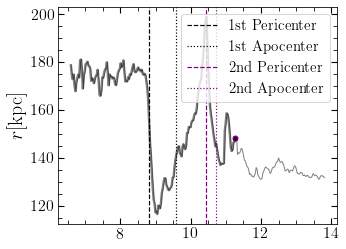

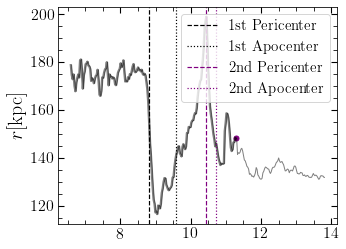

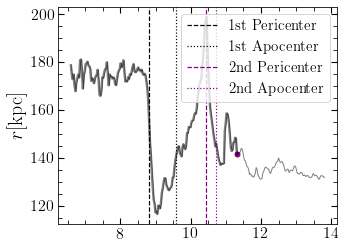

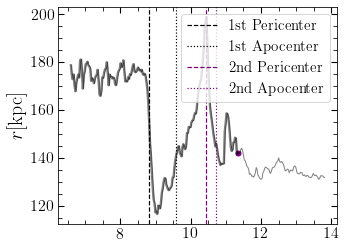

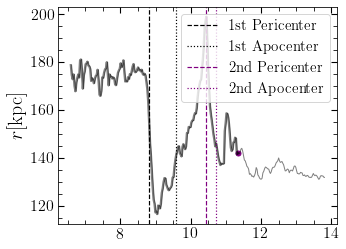

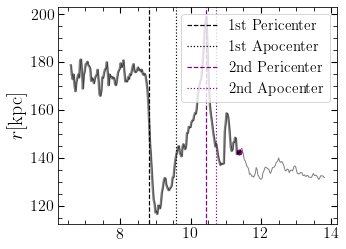

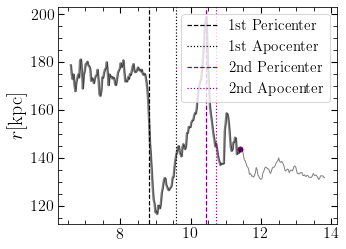

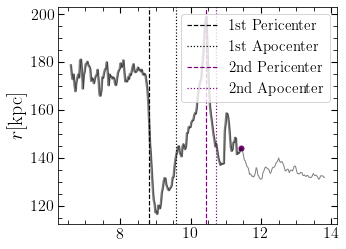

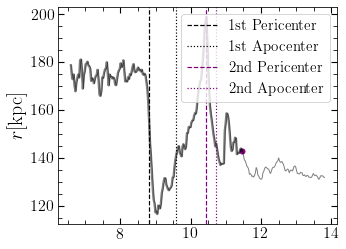

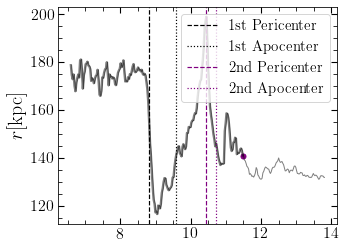

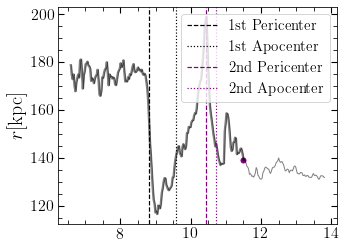

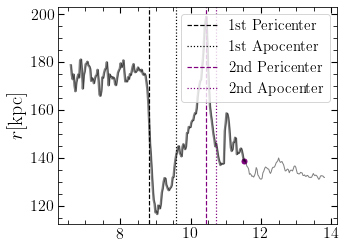

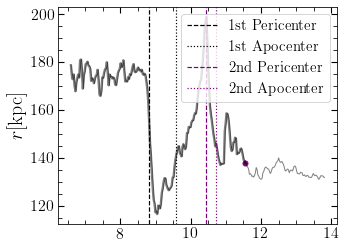

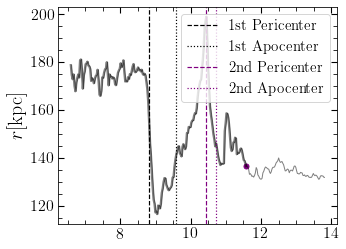

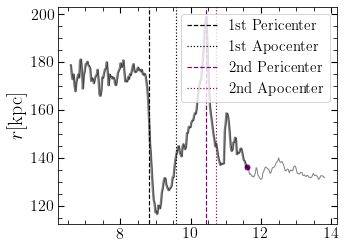

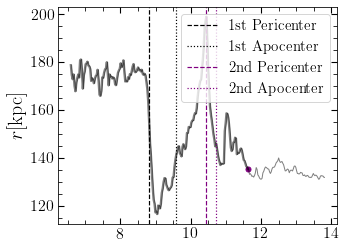

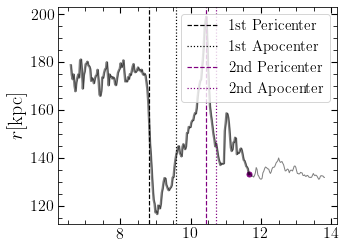

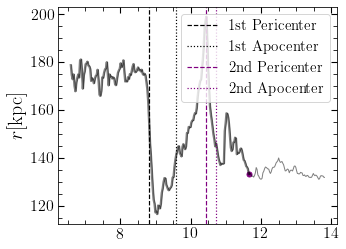

In [60]:
for k in range(300, 500):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharex=True)
    ax.plot(times[301:], vel_motion, c='k', alpha=0.5, lw=1)
    ax.plot(times[300:k+1], vel_motion[:k-300+1], c='k', alpha=0.5, lw=2)

    ax.scatter(times[k], vel_motion[:k-300+1][k-300], c='purple', alpha=1)

    if k >384:
        ax.axvline(times[385], c='k', lw=1.2, ls='--', label=r'$\rm{1st\ Pericenter}$')
    if k>415:
        ax.axvline(times[415], c='k', lw=1.2, ls=':', label=r'$\rm{1st\ Apocenter}$')
    if k>448:
        ax.axvline(times[449], c='purple', lw=1.2, ls='--', label=r'$\rm{2nd\ Pericenter}$')
    if k>459:
        ax.axvline(times[460], c='purple', lw=1.2, ls=':' , label=r'$\rm{2nd\ Apocenter}$')
    ax.set_ylabel(r'$r\rm{[kpc]}$')
    ax.legend(fontsize=15)

    #plt.grid()
    plt.savefig('../plots/exploration/m12b_host_vcom_{:03d}.png'.format(k), bbox_inches='tight', dpi=300)